In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 30})
#----------------
folder_saved = 'art_saved/'
folder_bin=folder = '../../../../scratch/network/csarra/allen_saved/binary/'


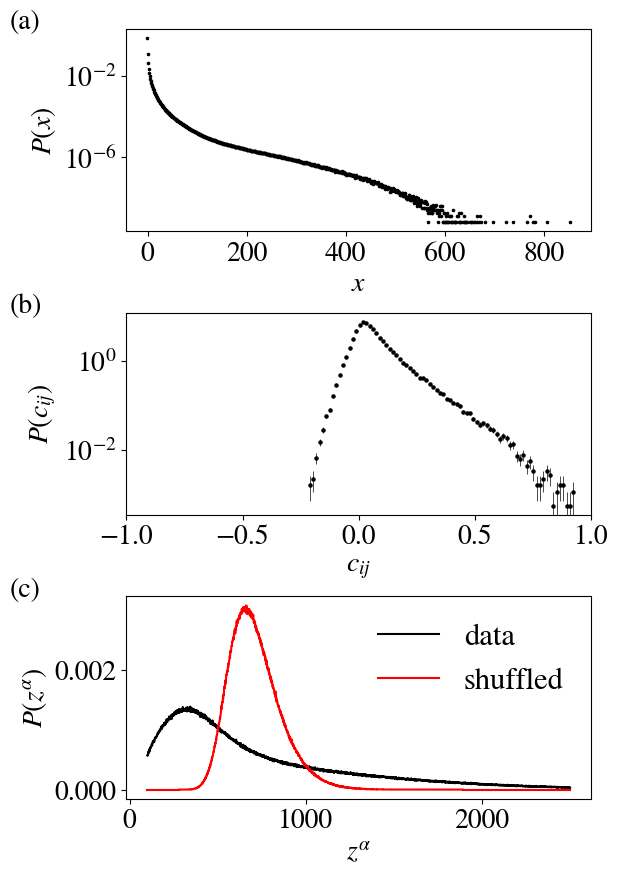

In [9]:

lx = -0.25
ly = 1

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 20})


z1, pz1= np.loadtxt(f'{folder_saved}histo_sumraw.dat')
z2, pz2= np.loadtxt(f'{folder_saved}histo_sumraw_shuffled.dat')
cc_raw = np.loadtxt(f'{folder_saved}cc_raw.dat') 

# -----------------------------------------------------------------
fig = plt.figure(figsize=(6,10))
plt.subplot(3,1,1)
histo = np.loadtxt(f'{folder_saved}_average_histo_rawc.dat')
bins = np.arange(0,854+2)-0.5

plt.scatter(bins[:-1], histo/histo.sum(), color='black', s=2.5)
plt.yscale('log')
plt.xlabel(r'$x$')
plt.ylabel(r'$P\left(x\right)$')
# plt.text(lx,ly,'(a)', transform=plt.gca().transAxes)
plt.text(lx,ly,'(a)', transform=plt.gca().transAxes)

# plt.xticks(fontsize=28);
# plt.yticks(fontsize=28);
#--------------------------


plt.subplot(3,1,2)

histo = np.histogram(cc_raw,80);
dx = histo[1][1]-histo[1][0]
plt.errorbar(histo[1][1:], histo[0]/histo[0].sum()/dx, np.sqrt(histo[0])/histo[0].sum()/dx,ls='', color='black', lw=0.5)
plt.scatter(histo[1][1:], histo[0]/histo[0].sum()/dx,s=5, color='black')


plt.yscale('log')
plt.xlim(-1,1)

plt.xlim(-1,1)
plt.yscale('log')

plt.xlabel(r'$c_{ij}$')
plt.ylabel(r'$P\left(c_{ij} \right)$')

ax = plt.gca()
# plt.text(-0.28,1,'(b)', transform=ax.transAxes)
plt.text(lx,ly,'(b)', transform=plt.gca().transAxes)
# plt.xticks(fontsize=28);
# plt.yticks(fontsize=28);

# -----------------------------------------------------------------
plt.subplot(3,1,3)
plt.plot(z1,pz1, color='black', label='data')
plt.plot(z2,pz2, color='red', label='shuffled')

z_miss1 = np.arange(z1.min(), z2.min())
z_miss2 = np.arange(z2.max(), z1.max())
plt.plot(z_miss1, np.array([0]*len(z_miss1)), color='red')
plt.plot(z_miss2, np.array([0]*len(z_miss2)), color='red')

plt.xlabel(r'$z^\alpha$')
plt.ylabel(r'$P\left(z^\alpha \right)$')
# plt.legend(bbox_to_anchor=(0.5,0.5))
plt.legend( frameon=False, loc='upper right', fontsize=22)
# plt.xlim(-10, 3550)

# plt.xticks(fontsize=28);
# plt.yticks(fontsize=28);
ax = plt.gca()
# plt.text(-0.35,1,'(c)', transform=ax.transAxes)
plt.text(lx,ly,'(c)', transform=plt.gca().transAxes)

fig.subplots_adjust(hspace=0.4)
# plt.tight_layout()

plt.savefig(f'{folder_saved}fig1-sum_cc.pdf', bbox_inches='tight')

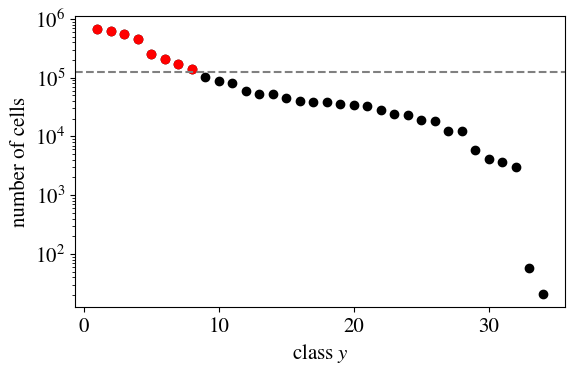

In [41]:
y_all = np.loadtxt(f'{folder}labels.dat') #all dataset label
cl, size_cl = np.unique(y_all, return_counts=True)

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(6,4))
plt.plot(np.arange(1,1+len(size_cl)), np.sort(size_cl)[::-1], 'o', color='black')
plt.plot(np.arange(1,1+len(size_cl[:8])), np.sort(size_cl)[::-1][:8], 'o', color='red')
plt.yscale('log')
plt.axhline(500+ (500*499)/2, ls='--', color='grey')
plt.xlabel(r'class $y$')
plt.ylabel(r'number of cells')
# plt.text(lx,ly,'(a)', transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig(f'{folder_saved}class_size.pdf', bbox_inches='tight')

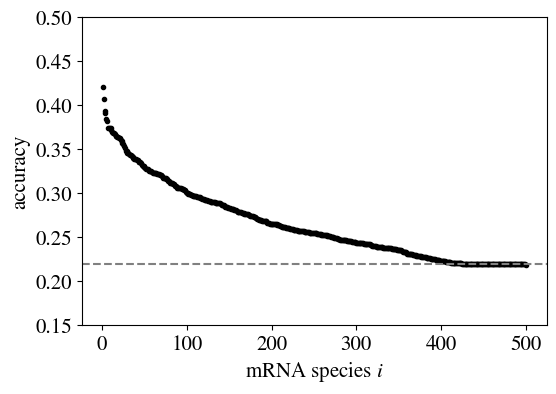

In [4]:
# one gene accuracy
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(6,4))
# svd_all = np.loadtxt(f'{folder_saved}1geneacc.dat')
# svd = svd_all[:-1]
# rnd_line = svd[-1][-1]

acc = np.loadtxt('ACC_new.dat')
plt.plot(np.arange(1,501), np.sort(acc)[::-1], 'o', color='black', ms =3)
plt.axhline(0.21919, color='grey', ls='--')


# plt.plot(svd[:,1][np.argsort(svd[:,1])[::-1]], 'o', color='black', ms=3)
# plt.axhline(rnd_line, color='grey', ls='--')


plt.xlabel('mRNA species $i$')
plt.ylabel('accuracy')
plt.ylim(0.15,0.5)
# plt.title('Accuracy with 1 gene')
plt.savefig(f'{folder_saved}acc_1gene.pdf', bbox_inches='tight')

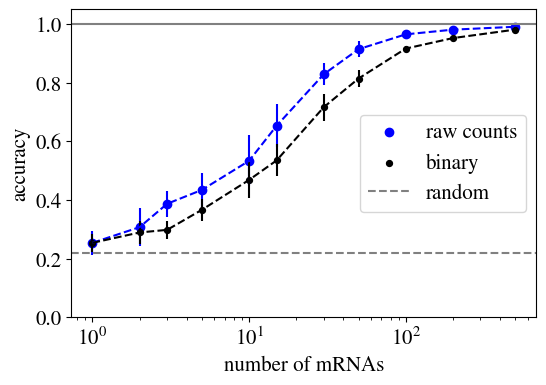

In [44]:
NUM_CLASSES = 8
filepath = f'{folder_saved}acc_nat_AVG_{NUM_CLASSES}.dat'
acc_nat_avg = np.loadtxt(filepath)
acc_nat_avg = acc_nat_avg[np.argsort(acc_nat_avg[:,0])]


filepath = f'{folder_saved}acc_bin_AVG_{NUM_CLASSES}.dat'
acc_bin_avg = np.loadtxt(filepath)


pclass = np.loadtxt(f'{folder_saved}pclass.dat')

acc_nat = np.loadtxt(f'{folder_saved}acc_nat.dat')
acc_n = np.loadtxt(f'{folder_saved}acc_n.dat')

#----------------------
acc_bin_avg[:,0] = np.hstack((acc_bin_avg[:-1,0],acc_n[-1,0]))
acc_bin_avg[:,1] =np.hstack((acc_bin_avg[:-1,1],acc_n[-1,1]))
acc_bin_avg[:,2] = np.hstack((acc_bin_avg[:-1,2],[0]))

acc_nat_avg[:,0] = np.hstack((acc_nat_avg[:-1,0],acc_nat[-1,0]))
acc_nat_avg[:,1] = np.hstack((acc_nat_avg[:-1,1],acc_nat[-1,1]))
acc_nat_avg[:,2] = np.hstack((acc_nat_avg[:-1,2],[0]))

#---------------------------

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(6,4))

plt.errorbar(acc_nat_avg[:,0],acc_nat_avg[:,1],acc_nat_avg[:,2], ls='--',color='blue')
plt.scatter(acc_nat_avg[:,0],acc_nat_avg[:,1],label='raw counts', color='blue')

plt.errorbar(acc_bin_avg[:,0],acc_bin_avg[:,1],acc_bin_avg[:,2], ls='--', color='black',)
plt.scatter(acc_bin_avg[:,0],acc_bin_avg[:,1],label='binary', color='black',s=18)

plt.axhline(pclass.max(), color='grey', ls='--', label='random')

plt.axhline(1, color='grey', ls='-')


plt.xscale('log')
plt.xlabel('number of mRNAs')
plt.ylabel('accuracy')
# plt.xlim(0.8,550)
plt.ylim(0,1.05)

# plt.legend(bbox_to_anchor=(0.52, 0.55))
plt.legend()

plt.savefig(f'{folder_saved}acc_avg.pdf', bbox_inches='tight')

In [13]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 20})

plt.rcParams['path.simplify'] = True

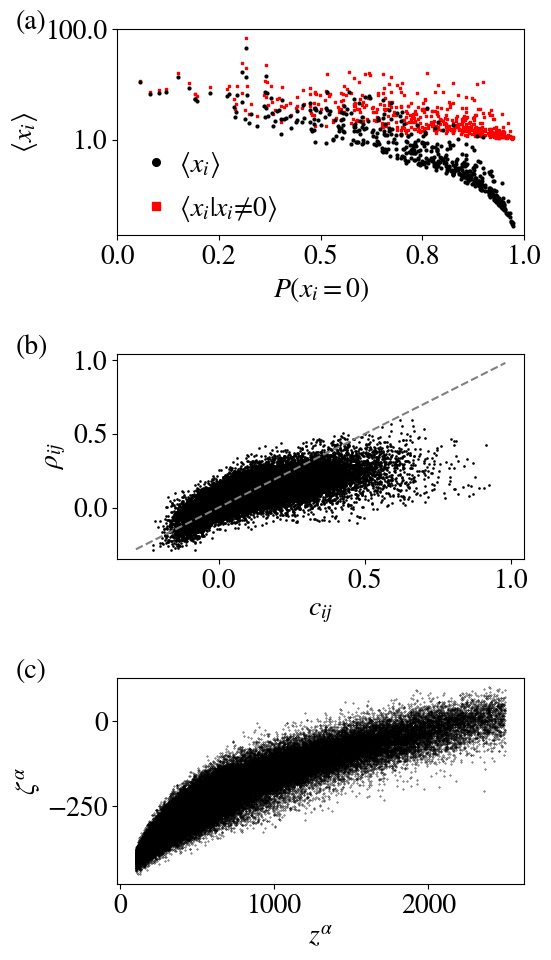

In [6]:
lx = -0.25
ly = 1

fig = plt.figure(figsize=(6,10))
#----------------------------------------------------
#----------------------------------------------------
plt.subplot(3,1,1)
p0_means = np.loadtxt(f'{folder_saved}p0_means.dat')
plt.scatter(p0_means[:,0],p0_means[:,2],s=4, color='red', label=r'$\langle x_i|x_i \ne 0 \rangle$', marker='s')
plt.scatter(p0_means[:,0],p0_means[:,1],s=4, color='black', label= r'$\langle x_i \rangle$')
plt.yscale('log')
plt.xlim(0,1)
plt.xlabel(r'$P(x_i = 0)$')
plt.ylabel(r'$\langle x_i \rangle$')
ax = plt.gca()

l1 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=5.5, label =r'$\langle x_i \rangle$')
l2 = mlines.Line2D([], [], color='red', marker='s', linestyle='None',
                          markersize=5.5, label=r'$\langle x_i|x_i \ne 0 \rangle$')
plt.legend(handles=[l1,l2],frameon=False,loc=(0,0), handletextpad=-0.2)

# plt.legend(frameon=False, loc=(0,0))
plt.text(lx,ly,'(a)', transform=plt.gca().transAxes)
# plt.legend()
# plt.xticks(fontsize=28);
# plt.yticks(fontsize=28);


#---------------------------------------------------
plt.subplot(3,1,2)



cc_raw = np.loadtxt(f'{folder_saved}cc_raw.dat') 
cc_bin = np.loadtxt(f'{folder_saved}cc_bin.dat') 

pairs = np.random.choice(len(cc_raw), 4000, replace=False)
# plt.scatter(cc_raw[pairs], cc_bin[pairs],s=0.8, alpha=1, color='black')
# plt.scatter(cc_raw[np.argsort(cc_raw)[:500]], cc_bin[np.argsort(cc_raw)[:500]],s=0.8, alpha=1, color='black')
# plt.scatter(cc_raw[np.argsort(cc_raw)[-500:]], cc_bin[np.argsort(cc_raw)[-500:]],s=0.8, alpha=1, color='black')

plt.scatter(cc_raw[np.argsort(cc_raw)[::]], cc_bin[np.argsort(cc_raw)[::]],s=0.8, alpha=1, color='black')




# plt.xlim(-0.4,0.6)
# plt.ylim(-0.4,0.6)

ax.xaxis.set_major_formatter('{x:.1f}')
ax.yaxis.set_major_formatter('{x:.1f}')
# plt.xticks(np.linspace(-0.4,1,4))
# plt.yticks(np.linspace(-0.4,1,4))
plt.ylabel(r'$\rho_{ij}$')
plt.xlabel(r'$c_{ij}$') 

xmin,xmax = plt.gca().get_xlim()
xx= np.linspace(xmin,xmax,100)
plt.plot(xx,xx, color='grey', ls='--')
ax = plt.gca()

# print(ax.get_xlim())
plt.xlim(-0.3464884361226208, 1.0440881541444529)
plt.text(lx,ly,'(b)', transform=ax.transAxes)
# plt.xticks(fontsize=28);
# plt.yticks(fontsize=28);



#---------------------------------------
plt.subplot(3,1,3)


kk=50
sum_zx = np.loadtxt(f'{folder_saved}sum_zx.dat') 
# plt.scatter(sum_zx[::kk,0],sum_zx[::kk,1],s=0.5, color='black')
plt.scatter(sum_zx[::,0],sum_zx[::,1],s=0.1, color='black')

ax = plt.gca()
# plt.xlabel(r'$z_x = \sum_i^{500} x_i$')
# plt.ylabel(r'$z_{\sigma} = \sum_i^{500} \sigma_i$')

plt.xlabel(r'$z^\alpha$')
plt.ylabel(r'$\zeta^\alpha$')
plt.text(lx,ly,'(c)', transform=ax.transAxes)

# plt.xticks(fontsize=28);
# plt.yticks(fontsize=28);
# plt.tight_layout()

# (-0.3464884361226208, 1.0440881541444529)
# (-20.0, 2620.0)
plt.xlim(-20,2620)


fig.subplots_adjust(hspace=0.45)
# fig.subplots_adjust(wspace=-0.2)
plt.tight_layout()

plt.rcParams['path.simplify'] = True
plt.savefig(f'{folder_saved}binarization.png', dpi=300)

In [7]:
len(np.argsort(cc_raw)[::30])

4159

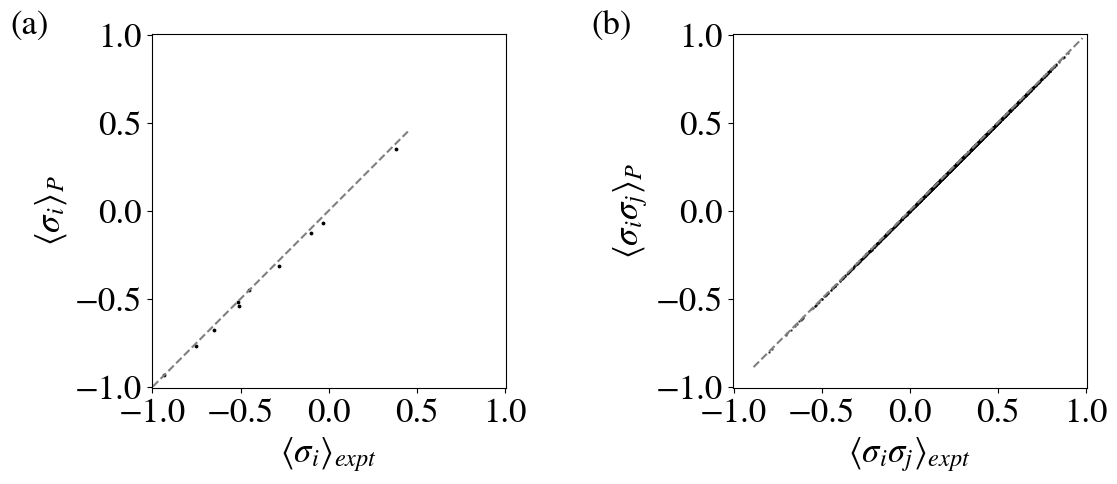

In [18]:
# plt.rcParams['path.simplify'] = True
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 25})




d=500
label='all'

f_model_IND = np.loadtxt(f'{folder_bin}f_model_IND_{d}_{label}.dat')
f_model = np.loadtxt(f'{folder_bin}f_model_{d}_{label}.dat')
f_data = np.loadtxt(f'{folder_bin}f_data_{d}_{label}.dat')

lx = -0.4
ly = 1
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
# plt.scatter(f_data[:d], f_model_IND[:d],s=3,alpha=1, color='blue', label='ind')
# plt.scatter(f_data[:d], f_model[:d],s=3,alpha=1, color='black', label='model')
plt.scatter(f_data[:d:50], f_model[:d:50],s=3,alpha=1, color='black', label='model')

xmin,xmax = plt.gca().get_xlim()
xx= np.linspace(xmin,xmax,100)
plt.plot(xx,xx, color='grey', ls='--')

# plt.legend(loc='lower right', fontsize=26)
plt.xlabel(r'$\langle \sigma_i \rangle_{expt}$')
plt.ylabel(r'$\langle \sigma_i \rangle_{P}$')
plt.text(lx,ly,'(a)', transform=plt.gca().transAxes)

plt.xlim(-1.005, 1.005)
plt.ylim(-1.005, 1.005)
plt.gca().set_aspect('equal')
plt.xticks([-1,-0.5,0,0.5,1])
plt.yticks([-1,-0.5,0,0.5,1])
#-----------------------------

plt.subplot(1,2,2)
# plt.scatter(f_data[d::], f_model_IND[d::], s=0.5,alpha=0.7,color='blue')
plt.scatter(f_data[d::50], f_model[d::50],s=0.5,alpha=0.7, color='black')
xmin,xmax = plt.gca().get_xlim()
xx= np.linspace(xmin,xmax,100)
plt.plot(xx,xx, color='grey', ls='--')

plt.xlabel(r'$\langle \sigma_i \sigma_j \rangle_{expt}$')
plt.ylabel(r'$\langle \sigma_i \sigma_j \rangle_{P}$')
plt.text(lx,ly,'(b)', transform=plt.gca().transAxes)

plt.xlim(-1.005, 1.005)
plt.ylim(-1.005, 1.005)
plt.gca().set_aspect('equal')

plt.xticks([-1,-0.5,0,0.5,1])
plt.yticks([-1,-0.5,0,0.5,1])


#-----------------------------
plt.tight_layout()


plt.savefig(f'{folder_saved}convergence_{d}_{label}.pdf', bbox_inches='tight')

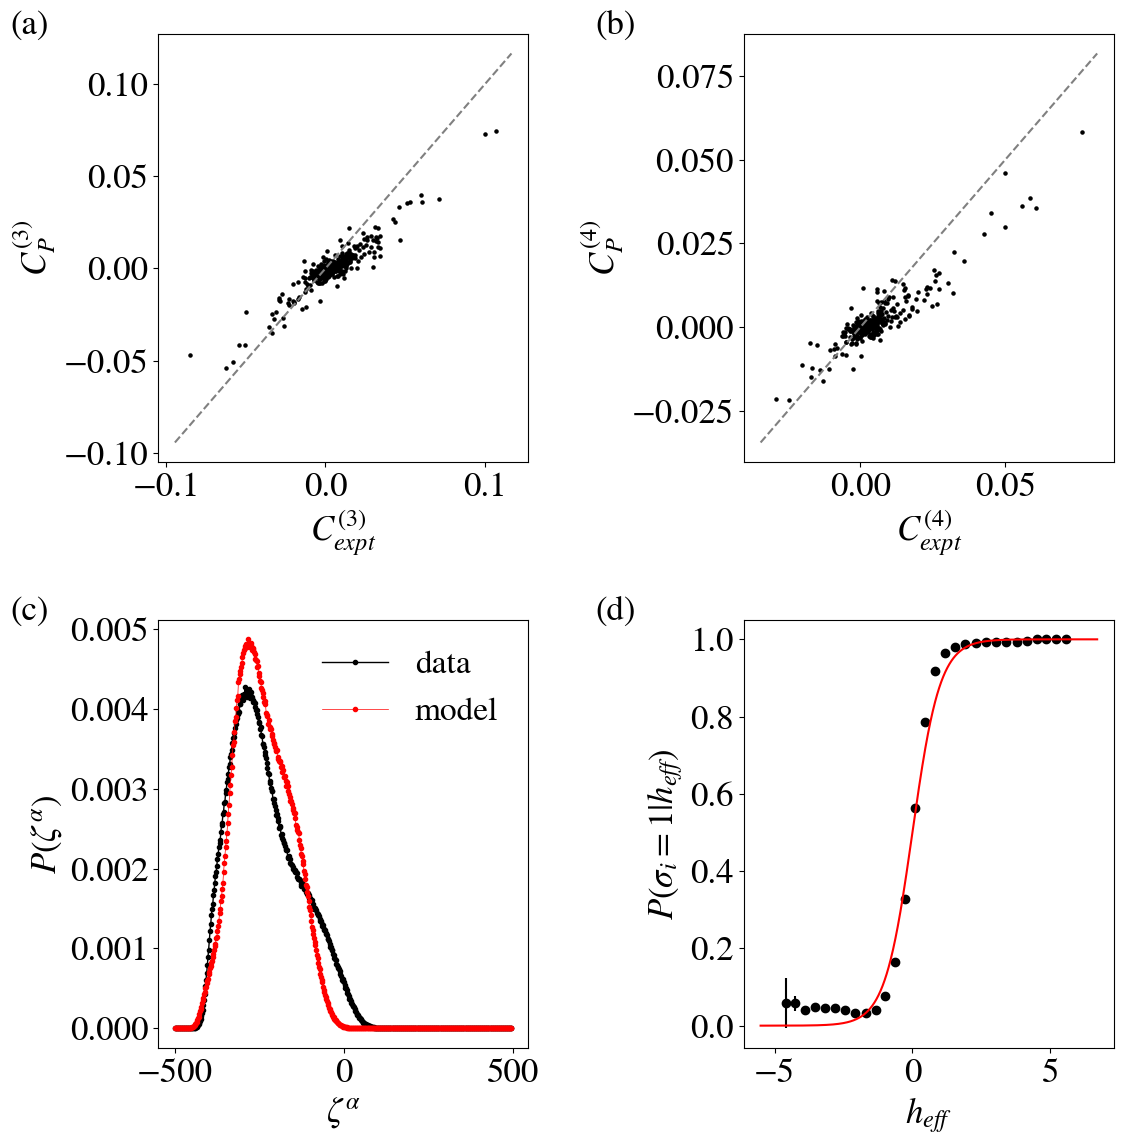

In [19]:
d = 500
label='all'

## load sum
zsum = np.loadtxt(f'{folder_bin}_histosum_{d}_{label}.dat')
zsums = np.loadtxt(f'{folder_bin}_histosums_{d}_{label}.dat')
histo = np.loadtxt(f'{folder_bin}_histosum_{d}_{label}_MODEL.dat')
xhisto = np.arange(-d,d,2)-1
## load moments
m2 = np.loadtxt(f'{folder}_m2_{d}_{label}.dat')[:,0]
m3 = np.loadtxt(f'{folder}_m3_{d}_{label}.dat')[:,0]
m4 = np.loadtxt(f'{folder}_m4_{d}_{label}.dat')[:,0]

m2_ind = np.loadtxt(f'{folder}_m2IND_{d}_all.dat')
m3_ind = np.loadtxt(f'{folder}_m3IND_{d}_all.dat')
m4_ind = np.loadtxt(f'{folder}_m4IND_{d}_all.dat')

m2_model = np.loadtxt(f'{folder}_m2model_{d}_all.dat')
m3_model = np.loadtxt(f'{folder}_m3model_{d}_all.dat')
m4_model = np.loadtxt(f'{folder}_m4model_{d}_all.dat')

##--------- load heff
saved = np.loadtxt(f'{folder_bin}_heff_{d}_{label}.dat')
valuesx, valuesy,valuesxerr,valuesyerr = saved

lx = -0.4
ly = 1
plt.figure(figsize=(12,12))

#---------------------------------------
plt.subplot(2,2,1)
# plt.scatter(m3,m3_ind, s=5, color='blue')
plt.scatter(m3,m3_model,s=5, color='black')
xmin,xmax = plt.gca().get_xlim()
xx= np.linspace(xmin,xmax,100)
plt.plot(xx,xx, color='grey', ls='--')

plt.xlabel(r'$C^{(3)}_{expt}$')
plt.ylabel(r'$C^{(3)}_{P}$')
plt.text(lx,ly,'(a)', transform=plt.gca().transAxes)

#---------------------------------------

plt.subplot(2,2,2)
# plt.scatter(m4,m4_ind, s=5, color='blue')
plt.scatter(m4,m4_model,s=5, color='black')
xmin,xmax = plt.gca().get_xlim()
xx= np.linspace(xmin,xmax,100)
plt.plot(xx,xx, color='grey', ls='--')

plt.xlabel(r'$C^{(4)}_{expt}$')
plt.ylabel(r'$C^{(4)}_{P}$')
plt.text(lx,ly,'(b)', transform=plt.gca().transAxes)

#---------------------------------------

plt.subplot(2,2,3)
# plt.plot(xhisto[:-1], zsums/zsums.sum()/2,'o-', label='ind', color='blue', ms=3,lw=1)
plt.plot(xhisto[:-1], zsum/zsum.sum()/2,'o-', label='data', color='black', ms=3,lw=1)
plt.plot(xhisto[:-1], histo,'o-',label='model', color='red', ms=3,lw=0.5)

plt.xlabel(r'$\zeta^\alpha$')
plt.ylabel(r'$P(\zeta^\alpha)$')
plt.legend(loc='upper right', fontsize=24, frameon=False)
plt.text(lx,ly,'(c)', transform=plt.gca().transAxes)

#---------------------------------------
plt.subplot(2,2,4)
# plt.errorbar((values[1:]+values[:-1])/2, (1+valuesy)/2, valuesyerr/2, ls='', color='black')
# plt.scatter((values[1:]+values[:-1])/2, (1+valuesy)/2,color='black')

plt.errorbar(valuesx, (1+valuesy)/2, xerr=valuesxerr,yerr=valuesyerr, ls='', color='black')
plt.scatter(valuesx, (1+valuesy)/2,color='black')

hh = np.linspace(1.2*valuesx.min(),1.2*valuesx.max(),1000)
plt.plot(hh, 1/(1+np.exp(-2*hh)), color='red')

plt.xlabel(r'$h_{eff}$')
plt.ylabel(r'$P(\sigma_i = 1 | h_{eff})$')
plt.text(lx,ly,'(d)', transform=plt.gca().transAxes)

plt.tight_layout()
#--------------------
plt.savefig(f'{folder_saved}ising_pred_{d}_{label}.pdf', bbox_inches='tight')

In [20]:
len(m2)

500

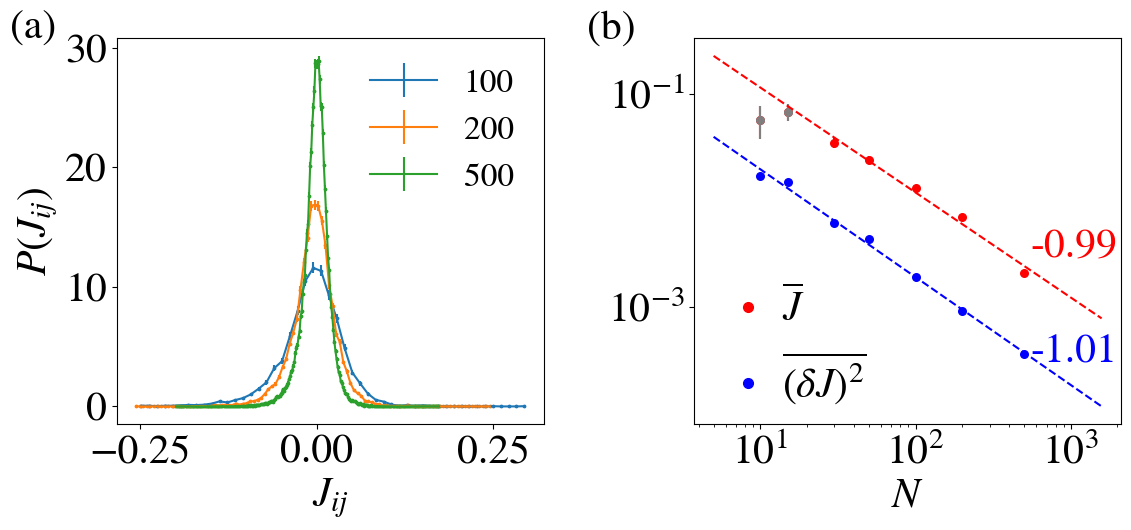

In [32]:
possible_labels =[1,2,9,28,29,30,31,33]

lx = -0.25
ly = 1
plt.figure(figsize=(12,6))

#-----------------------------------
plt.subplot(1,2,1)
for d in [100,200,500]:
    label ='all'
    q_all = np.loadtxt(f'{folder_bin}q_{d}_{label}.dat')
    histo = np.histogram(q_all[d:]/d, int(0.5*d));
    dh = histo[1][1]-histo[1][0]
    plt.errorbar(histo[1][1:], histo[0]/histo[0].sum()/dh, np.sqrt(histo[0])/histo[0].sum()/dh, label=d)
    plt.scatter(histo[1][1:], histo[0]/histo[0].sum()/dh, s=3)
    dx = histo[1][1]-histo[1][0] 
plt.xlabel(r'$J_{ij}$')
plt.ylabel(r'$P(J_{ij})$')
plt.legend(frameon=False, fontsize=24)
plt.text(lx,ly,'(a)', transform=plt.gca().transAxes)


#----------------------------------------------------------------------------------------
plt.subplot(1,2,2)
x =[]
y=[]
for d in [10,15,30,50,100,200,500]:
    label ='all'
    q_all = np.loadtxt(f'{folder_bin}q_{d}_{label}.dat')  
    plt.errorbar(d, -q_all[d:].mean()/d, q_all[d:].std()/d/np.sqrt(len(q_all[d:])), color='red')
    plt.scatter(d, -q_all[d:].mean()/d, color='red', s=30)
    plt.xscale('log')
    plt.yscale('log')
    x.append(d)
    y.append(-q_all[d:].mean()/d)
    

for d in [10,15]:
    label ='all'
    q_all = np.loadtxt(f'{folder_bin}q_{d}_{label}.dat')  
    plt.errorbar(d, -q_all[d:].mean()/d, q_all[d:].std()/d/np.sqrt(len(q_all[d:])), color='grey')
    plt.scatter(d, -q_all[d:].mean()/d, color='grey', s=30)
    plt.xscale('log')
    plt.yscale('log')
    
plt.xlabel('N')
x=(np.log(np.array(x))/np.log(10))[2:]
y=(np.log(np.array(y))/np.log(10))[2:]
from sklearn.linear_model import LinearRegression
m,q= np.polyfit(x, y, 1)
xx = np.linspace(np.log(5)/np.log(10),x.max()+0.5,100)
plt.plot(10**xx,10**(xx*m+q), label=f'{m:.2}', color='red', ls='--')
# plt.scatter(x,y)
plt.legend()
m_mean = m
# ----------------------- include also std
x =[]
y=[]
for d in [10,15,30,50,100,200,500]:
    label ='all'
    q_all = np.loadtxt(f'{folder_bin}q_{d}_{label}.dat')
    plt.scatter(d, q_all[d:].var()/d**2, color='blue', s=30)
    plt.xscale('log')
    plt.yscale('log')
    x.append(d)
    y.append(q_all[d:].var()/d**2)
plt.xlabel(r'$N$')
x=(np.log(np.array(x))/np.log(10))[:]
y=(np.log(np.array(y))/np.log(10))[:]
from sklearn.linear_model import LinearRegression
m,q= np.polyfit(x, y, 1)
xx = np.linspace(np.log(5)/np.log(10),x.max()+0.5,100)
plt.plot(10**xx,10**(xx*m+q), label=f'{m:.2f}', color='blue', ls='--')
plt.legend()

l1 = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                          markersize=7, label =r'$\overline{J}$')
l2 = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=7, label=r'$\overline{(\delta J)^2}$')
l3 = mlines.Line2D([], [], color='red', marker='', linestyle='-',
                          markersize=10, label =f'{m_mean:.2}')
l4 = mlines.Line2D([], [], color='blue', marker='', linestyle='--',
                          markersize=10, label=f'{m:.2f}')
plt.legend(handles=[l1,l2],frameon=False, loc=(-0.01,0), handletextpad=-0.2)
# plt.legend(handles=[l3,l4],frameon=False)

plt.text(0.55e3,3e-3,f'{m_mean:.2f}', color='red')
plt.text(0.55e3,0.3e-3,f'{m:.2f}', color='blue')
plt.text(lx,ly,'(b)', transform=plt.gca().transAxes)


plt.tight_layout()

plt.savefig(f'{folder_saved}b.parameters.pdf', bbox_inches='tight')

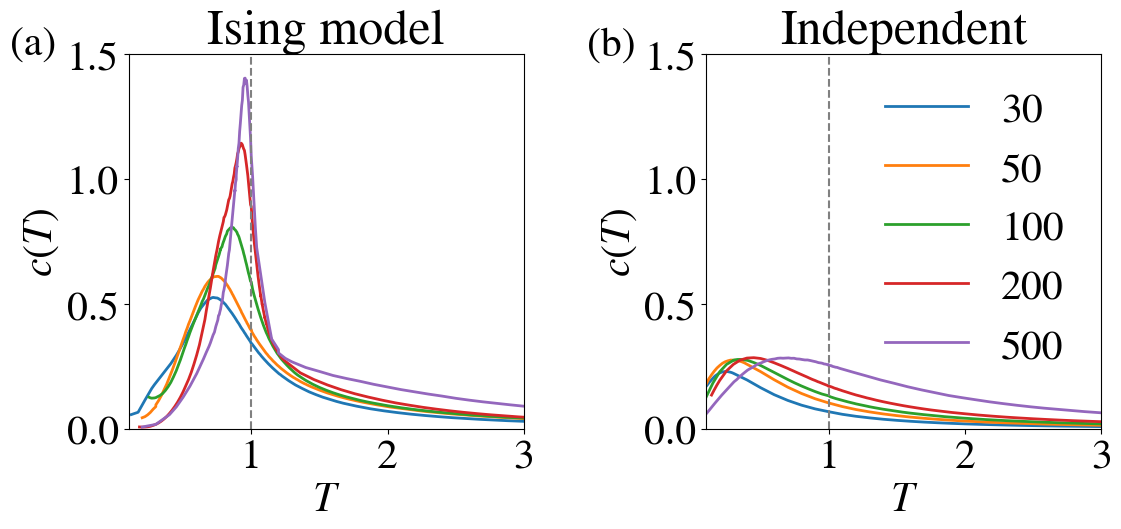

In [31]:
plt.figure(figsize=(12,6))
lx = -0.3
ly = 1

plt.subplot(1,2,1)
label='all'
for d in [30,50,100,200,500]:
    hc_saved = np.loadtxt(f'{folder_bin}heat_capacity_{d}_{label}.dat')
    hc_saved = hc_saved[np.argsort(hc_saved[:,0])]
    plt.plot(hc_saved[:,0], hc_saved[:,1]/hc_saved[:,0]**2/d,lw=2,label=d,)
plt.xlim(0.1,3)
plt.ylim(0,1.5)
plt.axvline(1, ls='--', color='grey')
plt.xlabel(r'$T$')
plt.ylabel(r'$c\left(T\right)$')
plt.title('Ising model')
# plt.legend(frameon=False)

plt.text(lx,ly,'(a)', transform=plt.gca().transAxes)

# ---------------------------------------
plt.subplot(1,2,2)
label='all'
for d in [30,50,100,200,500]:
    hc_saved = np.loadtxt(f'{folder_bin}heat_capacityIND_{d}_{label}.dat')
    hc_saved = hc_saved[np.argsort(hc_saved[:,0])]
    plt.plot(hc_saved[:,0], hc_saved[:,1]/hc_saved[:,0]**2/d, label=d, lw=2)
plt.xlim(0.1,3)
plt.ylim(0,1.5)
plt.axvline(1, ls='--', color='grey')

plt.xlabel(r'$T$')
plt.ylabel(r'$c \left(T\right)$')
plt.title('Independent')
plt.text(lx,ly,'(b)', transform=plt.gca().transAxes)
plt.legend(frameon=False)

plt.tight_layout()

plt.savefig(f'{folder_saved}specific_heat.pdf', bbox_inches='tight')

In [4]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 15})
#--------------------------------------------------------------------
# Use LaTeX for rendering text

from functions import *

plt.figure(figsize=(6,4))

for d in [30,50,100,200,500]:
    label='all'

    q = np.loadtxt(f'{folder_bin}q_{d}_{label}.dat')
    h,J = get_hJ(q,d)

    plt.plot(np.array(range(d))/d,np.sort(np.abs(np.linalg.eigvals(J)))[::-1]/np.sort(np.abs(np.linalg.eigvals(J)))[::-1][0], 'o',
            label=d, ms=3)
    
    plt.xlabel(r'$i/N$')
    plt.ylabel(r'$|\lambda_i/\lambda_0|$')    
plt.legend()
    
    
plt.gca().set_aspect('equal')
plt.savefig(f'{folder_saved}eigJ.pdf', bbox_inches='tight')

2024-08-14 04:14:39.490936: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1

KeyboardInterrupt



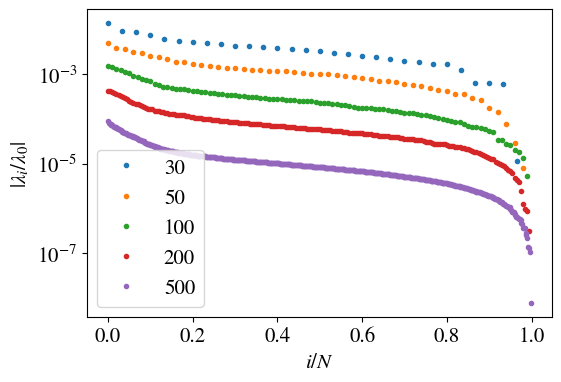

In [38]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 15})
#--------------------------------------------------------------------
# Use LaTeX for rendering text

from functions import *

plt.figure(figsize=(6,4))

for d in [30,50,100,200,500]:
    label='all'

    q = np.loadtxt(f'{folder_bin}q_{d}_{label}.dat')
    h,J = get_hJ(q,d)

    plt.plot(np.array(range(d))/d, np.sort(np.abs(np.linalg.eigvals(J)))[::-1]/(np.linalg.eigvals(J)**2).sum(), 'o',
            label=d, ms=3)
    
    plt.xlabel(r'$i/N$')
    plt.ylabel(r'$|\lambda_i/\lambda_0|$')    
plt.legend()
    
plt.yscale('log')
# plt.gca().set_aspect('equal')
# plt.savefig(f'{folder_saved}eigJ.pdf', bbox_inches='tight')

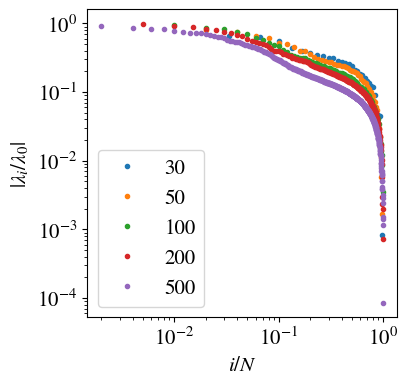

In [19]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 15})
#--------------------------------------------------------------------
# Use LaTeX for rendering text

from functions import *

plt.figure(figsize=(4,4))

for d in [30,50,100,200,500]:
    label='all'

    q = np.loadtxt(f'{folder_bin}q_{d}_{label}.dat')
    h,J = get_hJ(q,d)

    plt.plot(np.array(range(d))/d,np.sort(np.abs(np.linalg.eigvals(J)))[::-1]/np.sort(np.abs(np.linalg.eigvals(J)))[::-1][0], 'o',
            label=d, ms=3)
    
    plt.xlabel(r'$i/N$')
    plt.ylabel(r'$|\lambda_i/\lambda_0|$')    
plt.legend()
plt.xscale('log')
plt.yscale('log') 

    
# plt.gca().set_aspect('equal')

# plt.savefig(f'{folder_saved}eigJ.pdf', bbox_inches='tight')

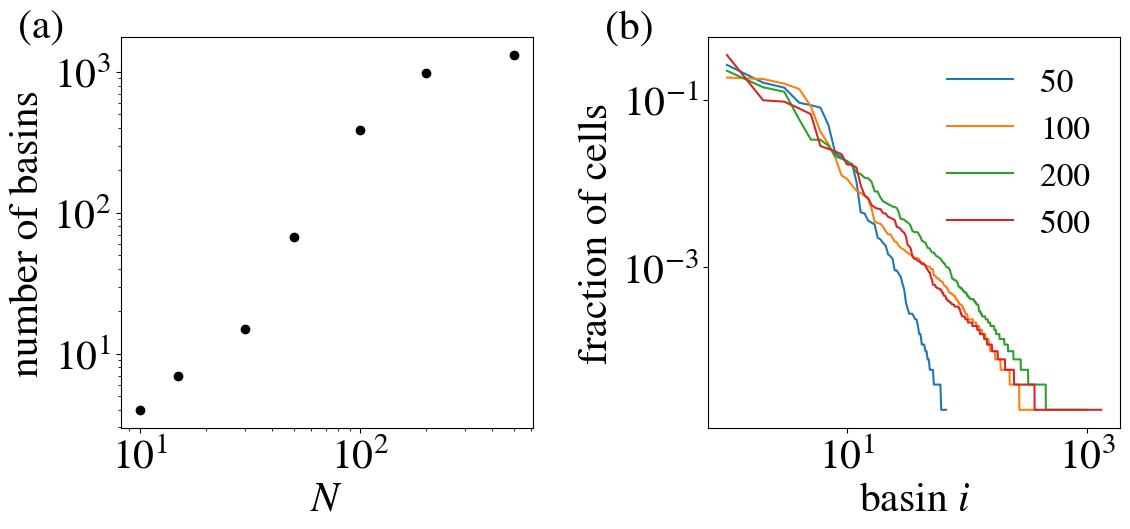

In [33]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 30})
#--------------------------------------------------------------------

sizes = [10,15,30,50,100,200,500]
label='all'

size_vs_d =[]
nbasins_vs_d=[]
for d in (sizes):
    minima = np.loadtxt(f'{folder_bin}minimaN_{d}_{label}.dat')
    lst, size = np.unique(minima, return_counts=True,axis=0)
    size_vs_d.append((d,len(lst)))
    nbasins_vs_d.append(size)
lx = -0.25
ly = 1
plt.figure(figsize=(12,6))
#--------------------------

plt.subplot(1,2,1)
size_vs_d = np.array(size_vs_d)

plt.scatter(size_vs_d[:,0], size_vs_d[:,1], color='black')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$N$')
plt.ylabel('number of basins')
plt.text(lx,ly,'(a)', transform=plt.gca().transAxes)

#-----------------------
plt.subplot(1,2,2)


for i in range(3,len(nbasins_vs_d)):
    plt.plot(range(1, 1+len(nbasins_vs_d[i])), np.sort(nbasins_vs_d[i])[::-1]/nbasins_vs_d[i].sum(),
            label=sizes[i])
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=24, loc='upper right', frameon=False)
plt.xlabel(r'basin $i$')
plt.ylabel(r'fraction of cells')

plt.text(lx,ly,'(b)', transform=plt.gca().transAxes)
plt.tight_layout()
# plt.savefig(f'{folder_saved}basins_props.pdf', bbox_inches='tight')


In [124]:
import matplotlib

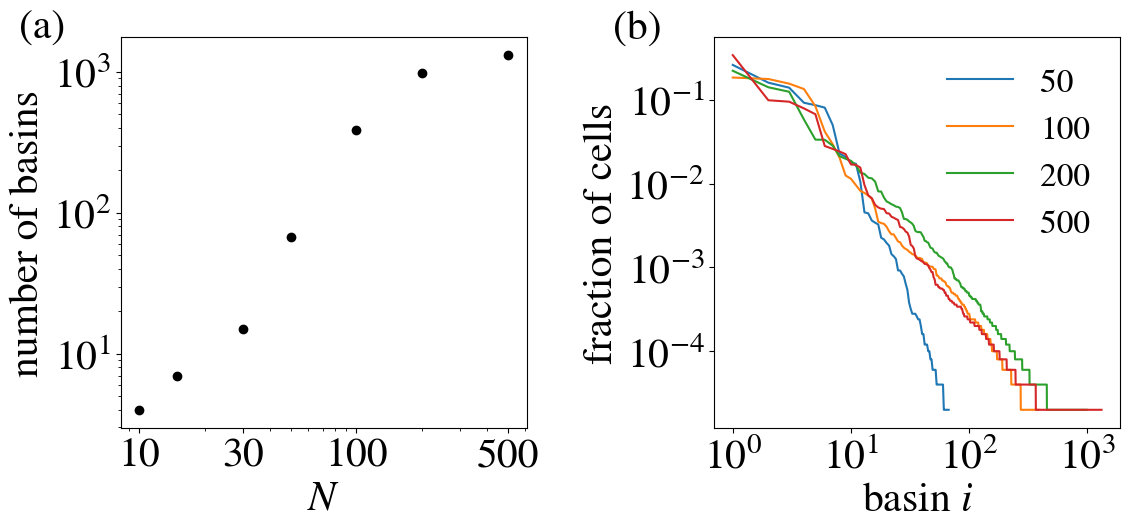

In [129]:
lx = -0.25
ly = 1
plt.figure(figsize=(12,6))
#--------------------------

plt.subplot(1,2,1)
size_vs_d = np.array(size_vs_d)

plt.scatter(size_vs_d[:,0], size_vs_d[:,1], color='black')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$N$')
plt.ylabel('number of basins')
plt.text(lx,ly,'(a)', transform=plt.gca().transAxes)

ax1=plt.gca()
ax1.set_xscale('log')
ax1.set_xticks([10,30,100, 500])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#-----------------------
plt.subplot(1,2,2)


for i in range(3,len(nbasins_vs_d)):
    plt.plot(range(1, 1+len(nbasins_vs_d[i])), np.sort(nbasins_vs_d[i])[::-1]/nbasins_vs_d[i].sum(),
            label=sizes[i])
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=24, loc='upper right', frameon=False)
plt.xlabel(r'basin $i$')
plt.ylabel(r'fraction of cells')
plt.xticks([1,10,100,1000])
plt.yticks([1e-4,1e-3,1e-2,1e-1])


plt.text(lx,ly,'(b)', transform=plt.gca().transAxes)
plt.tight_layout()

plt.savefig(f'{folder_saved}basins_props.pdf', bbox_inches='tight')


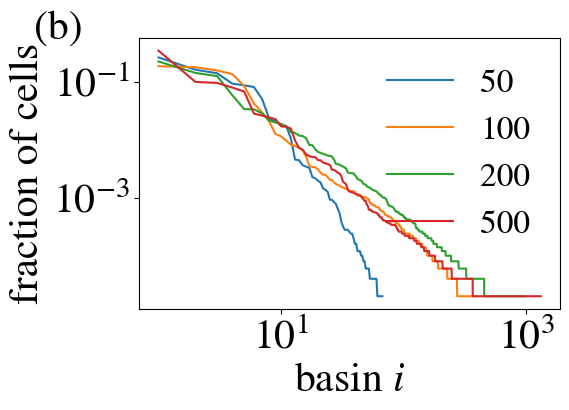

In [23]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 30})
#--------------------------------------------------------------------

sizes = [10,15,30,50,100,200,500]
label='all'

size_vs_d =[]
nbasins_vs_d=[]
for d in (sizes):
    minima = np.loadtxt(f'{folder_bin}minimaN_{d}_{label}.dat')
    lst, size = np.unique(minima, return_counts=True,axis=0)
    size_vs_d.append((d,len(lst)))
    nbasins_vs_d.append(size)
lx = -0.25
ly = 1


for i in range(3,len(nbasins_vs_d)):
    plt.plot(range(1, 1+len(nbasins_vs_d[i])), np.sort(nbasins_vs_d[i])[::-1]/nbasins_vs_d[i].sum(),
            label=sizes[i])
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=24, loc='upper right', frameon=False)
plt.xlabel(r'basin $i$')
plt.ylabel(r'fraction of cells')

plt.text(lx,ly,'(b)', transform=plt.gca().transAxes)
plt.tight_layout()

-1.693179199652875 -0.4807960879951941


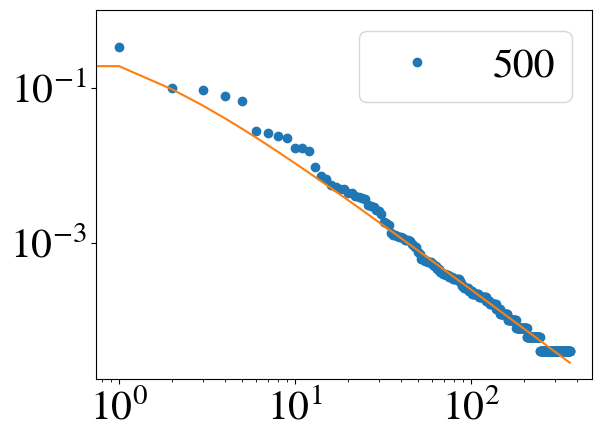

In [101]:
plt.yscale('log')
plt.xscale('log')

for i in [6]:
    x = np.array(range(1, 1+len(nbasins_vs_d[i][nbasins_vs_d[i]>1])))
    y = [np.sort(nbasins_vs_d[i])[::-1]/nbasins_vs_d[i].sum()][0][:len(x)]
    plt.plot(x,y, 'o', label=sizes[i])

    from sklearn.linear_model import LinearRegression
    m,q= np.polyfit(np.log(x), np.log(y), 1)

    xx = np.linspace(x.min(),x.max())
    plt.plot(np.exp(m*np.log(x)+q))
    print(m,q)
    
    plt.legend()

(-1.693179199652875, -0.4807960879951941)

In [5]:
from functions import *


label='all'
d=500

q = np.loadtxt(f'{folder_bin}q_{d}_{label}.dat')
h,J = get_hJ(q,d)
largest_minima = np.loadtxt(f'{folder_bin}first_minima_{d}_{all}.dat')
en_minima = get_H(largest_minima,J,h)


zsel_all = np.loadtxt(f'{folder}_datasel2_500.dat')[:]
lsel = np.loadtxt(f'{folder}_datasel2_label_500.dat')[:]
first_minima = np.loadtxt(f'{folder_bin}first_minima_{d}_{all}.dat')
basin = np.loadtxt(f'{folder_bin}basinN_{d}_{label}.dat').astype(int)

A = np.cov(zsel_all[:,:].T)
eigenvalues, eigenvectors = np.linalg.eig(A)

# np.argsort can only provide lowest to highest; use [::-1] to reverse the list
order_of_importance = np.argsort(eigenvalues)[::-1] 

# utilize the sort order to sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance]
sorted_eigenvectors = eigenvectors[:,order_of_importance] # sort the columns
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)


k=2
reduced_data = np.matmul(zsel_all, sorted_eigenvectors[:,:k]) # transform the original data
reduced_min= np.matmul(first_minima, sorted_eigenvectors[:,:k]) # transform the original data


print(explained_variance[:2])

2024-08-14 04:16:15.445694: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-08-14 04:16:15.454658: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-14 04:16:15.454671: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-14 04:16:15.454684: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (adroit-h11n4): /proc/driver/nvidia/version does not exist
2024-08-14 04:16:15.458659: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebu

[0.101526   0.02772787]


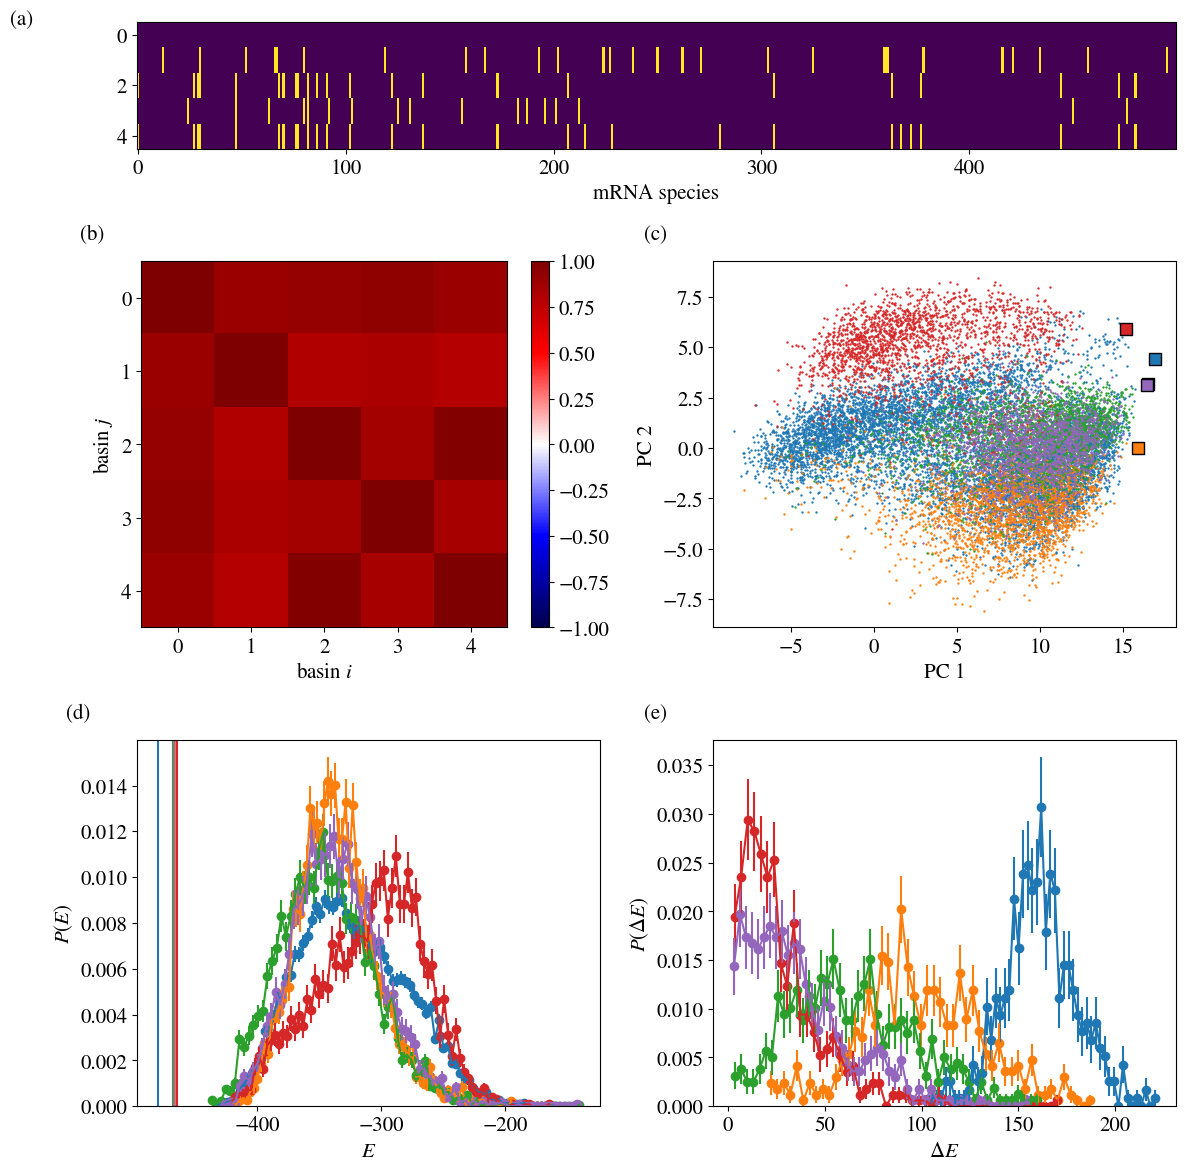

In [6]:
# Create some data to plot
label='all'
data = [np.random.rand(10, 10) for _ in range(5)]

# Create a figure with a specific size
fig = plt.figure(figsize=(12, 12))

# Create a GridSpec layout
gs = fig.add_gridspec(5, 2)

# Add subplots to the GridSpec
ax1 = fig.add_subplot(gs[0, :])  # First row, spanning both columns
ax2 = fig.add_subplot(gs[1:3, 0])  # Second row, first column
ax3 = fig.add_subplot(gs[1:3, 1])  # Second row, second column
ax4 = fig.add_subplot(gs[3:, 0])  # Third row, first column
ax5 = fig.add_subplot(gs[3:, 1])  # Third row, second column

# Plot the data
im1 = ax1.imshow(first_minima[:5], aspect='auto', interpolation='none')
im2 = ax2.imshow((first_minima[:5][:,None]*first_minima[:5][None,:]).mean(-1), vmin=-1,vmax=1, cmap='seismic',
                aspect='equal')

for i in range(5):
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    ax3.scatter(reduced_data[:,0][basin==i][::2], reduced_data[:,1][basin==i][::2], s=0.5,color=color)
    ax3.scatter(reduced_min[i,0], reduced_min[i,1],s=80,color=color,
               marker='s', edgecolor='black', linewidth=1, label=k+1)
plt.gca().set_prop_cycle(None)
    
    


for k in range(5):
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    en = np.loadtxt(f'{folder_bin}energy_basin_{k}_d{d}_{label}.dat')
    histo = np.histogram(en,80);
    dx = histo[1][1]-histo[1][0]
    ax4.scatter(histo[1][1:], histo[0]/ histo[0].sum()/dx, color=color, label=k)
    ax4.errorbar(histo[1][1:], histo[0]/ histo[0].sum()/dx, np.sqrt(histo[0])/histo[0].sum()/dx,color=color)   
    ax4.axvline(np.array(en_minima)[k],color=color)

plt.gca().set_prop_cycle(None)   
for k in range(5):
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    b1 = np.loadtxt(f'{folder_bin}barriers_final_barrier_{d}_{k}_.dat')    
    histo = np.histogram(b1-en_minima[k],50);
    dx = histo[1][1]-histo[1][0]
    ax5.scatter(histo[1][1:], histo[0]/ histo[0].sum()/dx, color=color, label=k)
    ax5.errorbar(histo[1][1:], histo[0]/ histo[0].sum()/dx, np.sqrt(histo[0])/histo[0].sum()/dx,color=color) 
    
ax1.set_xlabel('mRNA species')

ax2.set_xlabel(r'basin $i$')
ax2.set_ylabel(r'basin $j$')

ax3.set_xlabel('PC 1')
ax3.set_ylabel('PC 2')

ax4.set_xlabel(r'$E$')
ax4.set_ylabel(r'$P(E)$')


ax5.set_xlabel(r'$\Delta E$')
ax5.set_ylabel(r'$P(\Delta E)$')

ax4.set_ylim(0,)
ax5.set_ylim(0,)

cbar2 = fig.colorbar(im2, ax=ax2)
# ax1.text(0, 1.3, '(a)', transform=ax.transAxes, 
#              va='top', ha='right')

# Add labels a, b, c, d, e
labels2 = ['(a)','(b)', '(c)', '(d)', '(e)']
axes = [ax1, ax2, ax3, ax4, ax5]
for labell, ax in zip(labels2, axes):
    ax.text(-0.1, 1.1, labell, transform=ax.transAxes, 
             va='top', ha='right')

# Show the plot
plt.tight_layout()

# plt.savefig(f'{folder_saved}energy_landscape_{d}.pdf', bbox_inches='tight')
plt.savefig(f'{folder_saved}energy_landscape_{d}.png', bbox_inches='tight', dpi=300)



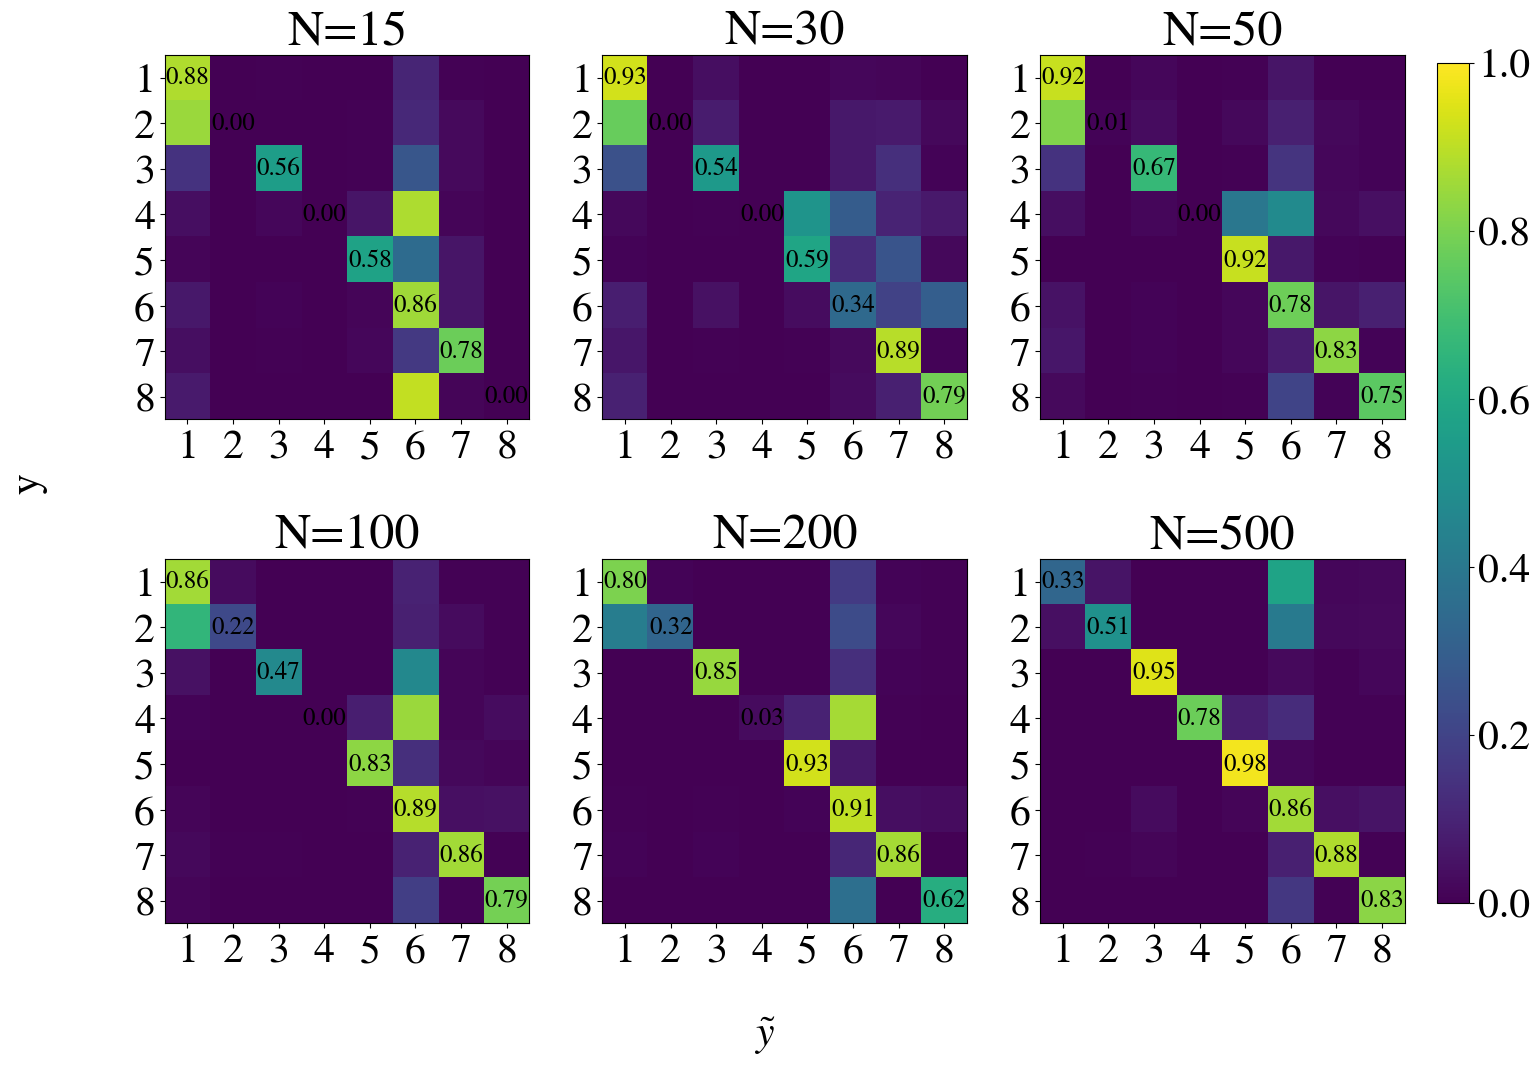

In [37]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 30})

ds = [15,30,50,100,200,500]
labellist= np.array([ 1, 30, 31, 33, 9, 29 , 2, 28])

import matplotlib.pyplot as plt
import numpy as np

# Sample data for a 2x3 grid
i=0
data1 = np.loadtxt(f'{folder_bin}confusion_{ds[i]}_{label}.dat');i+=1
data2 = np.loadtxt(f'{folder_bin}confusion_{ds[i]}_{label}.dat');i+=1
data3 = np.loadtxt(f'{folder_bin}confusion_{ds[i]}_{label}.dat');i+=1
data4 = np.loadtxt(f'{folder_bin}confusion_{ds[i]}_{label}.dat');i+=1
data5 = np.loadtxt(f'{folder_bin}confusion_{ds[i]}_{label}.dat');i+=1
data6 = np.loadtxt(f'{folder_bin}confusion_{ds[i]}_{label}.dat');i+=1

fig, axs = plt.subplots(2, 3, figsize=(16, 12))

# Plot data on each subplot
im1 = axs[0, 0].imshow(data1,vmin=0,vmax=1)
im2 = axs[0, 1].imshow(data2,vmin=0,vmax=1)
im3 = axs[0, 2].imshow(data3,vmin=0,vmax=1)
im4 = axs[1, 0].imshow(data4,vmin=0,vmax=1)
im5 = axs[1, 1].imshow(data5,vmin=0,vmax=1)
im6 = axs[1, 2].imshow(data6,vmin=0,vmax=1)

i=0
axs[0, 0].set_title(f'N={ds[i]}');i+=1
axs[0, 1].set_title(f'N={ds[i]}');i+=1
axs[0, 2].set_title(f'N={ds[i]}');i+=1
axs[1, 0].set_title(f'N={ds[i]}');i+=1
axs[1, 1].set_title(f'N={ds[i]}');i+=1
axs[1, 2].set_title(f'N={ds[i]}');i+=1


# List of data arrays and corresponding axes
data_list = [data1, data2, data3, data4, data5, data6]
axs_list = [axs[0, 0], axs[0, 1], axs[0, 2], axs[1, 0], axs[1, 1], axs[1, 2]]

# Annotate diagonal elements
for data, ax in zip(data_list, axs_list):
    numrows, numcols = data.shape
    for i in range(min(numrows, numcols)):
        ax.text(i, i, f'{data[i, i]:.2f}', ha='center', va='center', color='black', fontsize=18)
        
        ax.set_xticks(range(len(labellist)), range(1,(len(labellist)+1)))
        ax.set_yticks(range(len(labellist)), range(1,(len(labellist)+1)))

# Create an axis on the right side for the colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

# Create a single colorbar
cbar = fig.colorbar(im1, cax=cbar_ax)

fig.text(0.5, 0.04, r'$\tilde{y}$', ha='center', va='center')
fig.text(0.04, 0.5, 'y', ha='center', va='center', rotation='vertical')

# plt.show()

plt.savefig(f'{folder_saved}confusion_1ising.pdf', bbox_inches='tight')

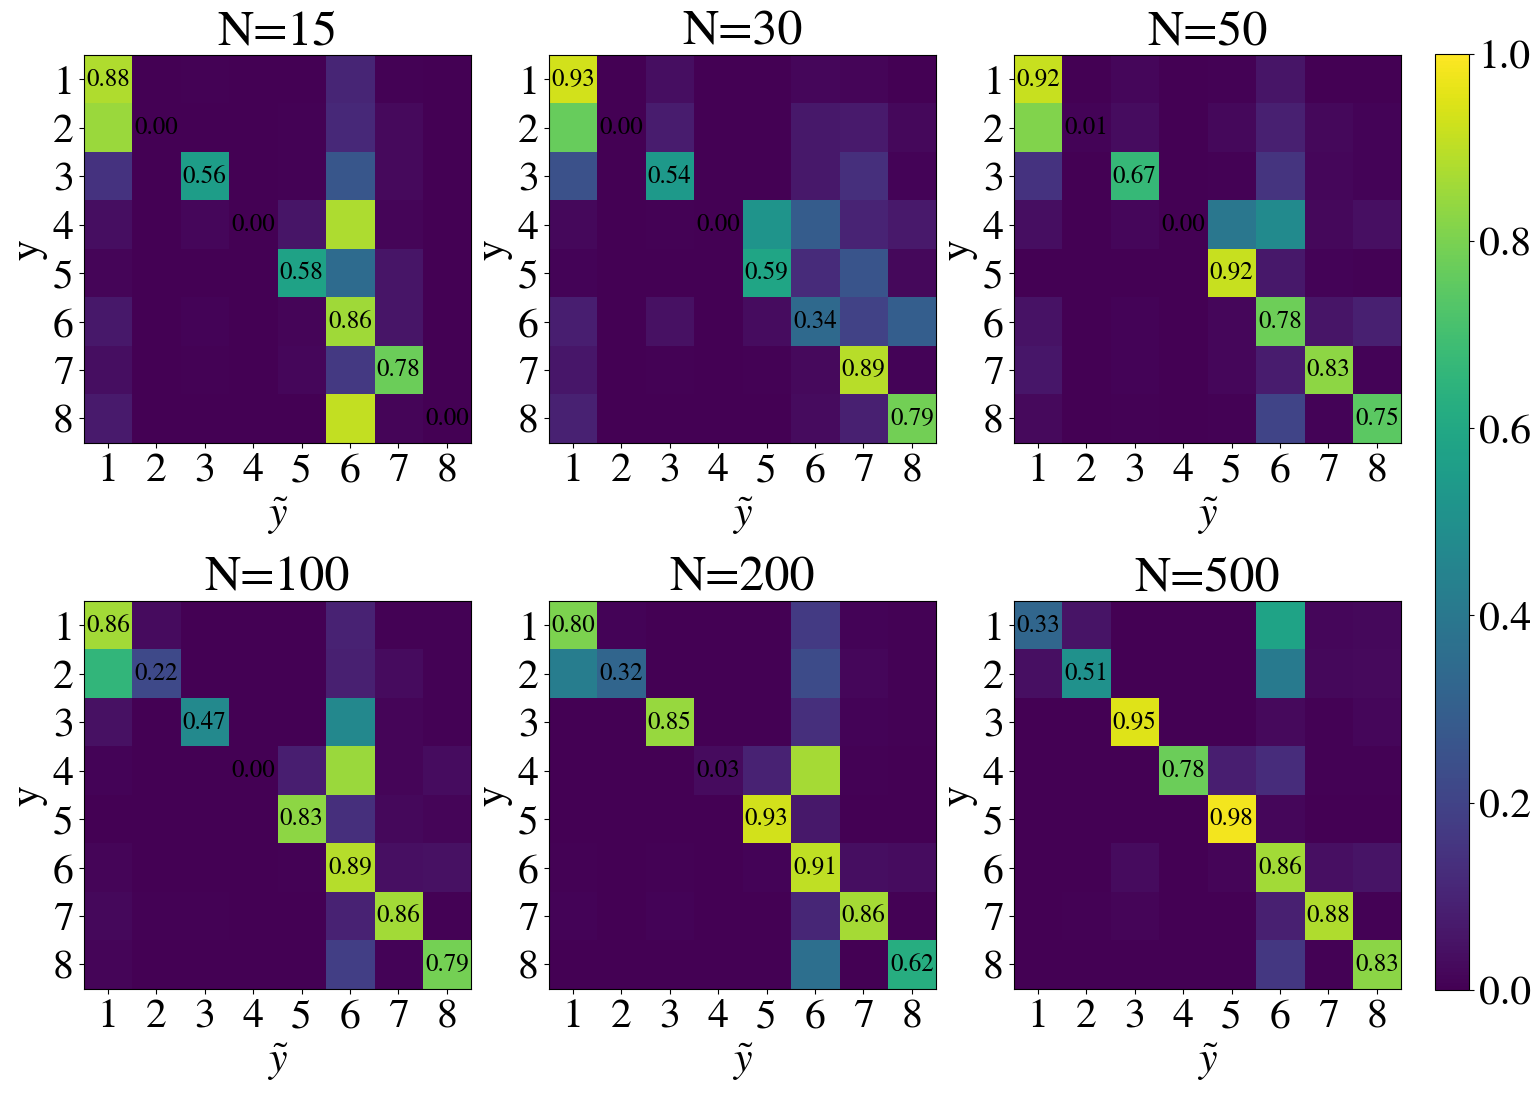

In [57]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 30})

ds = [15,30,50,100,200,500]
labellist= np.array([ 1, 30, 31, 33, 9, 29 , 2, 28])

import matplotlib.pyplot as plt
import numpy as np

# Sample data for a 2x3 grid
i=0
data1 = np.loadtxt(f'{folder_bin}confusion_{ds[i]}_{label}.dat');i+=1
data2 = np.loadtxt(f'{folder_bin}confusion_{ds[i]}_{label}.dat');i+=1
data3 = np.loadtxt(f'{folder_bin}confusion_{ds[i]}_{label}.dat');i+=1
data4 = np.loadtxt(f'{folder_bin}confusion_{ds[i]}_{label}.dat');i+=1
data5 = np.loadtxt(f'{folder_bin}confusion_{ds[i]}_{label}.dat');i+=1
data6 = np.loadtxt(f'{folder_bin}confusion_{ds[i]}_{label}.dat');i+=1

fig, axs = plt.subplots(2, 3, figsize=(17, 13))

# Plot data on each subplot
im1 = axs[0, 0].imshow(data1,vmin=0,vmax=1)
im2 = axs[0, 1].imshow(data2,vmin=0,vmax=1)
im3 = axs[0, 2].imshow(data3,vmin=0,vmax=1)
im4 = axs[1, 0].imshow(data4,vmin=0,vmax=1)
im5 = axs[1, 1].imshow(data5,vmin=0,vmax=1)
im6 = axs[1, 2].imshow(data6,vmin=0,vmax=1)

i=0
axs[0, 0].set_title(f'N={ds[i]}');i+=1
axs[0, 1].set_title(f'N={ds[i]}');i+=1
axs[0, 2].set_title(f'N={ds[i]}');i+=1
axs[1, 0].set_title(f'N={ds[i]}');i+=1
axs[1, 1].set_title(f'N={ds[i]}');i+=1
axs[1, 2].set_title(f'N={ds[i]}');i+=1


axs[0, 0].set_xlabel(r'$\tilde{y}$')
axs[0, 1].set_xlabel(r'$\tilde{y}$')
axs[0, 2].set_xlabel(r'$\tilde{y}$')
axs[1, 0].set_xlabel(r'$\tilde{y}$')
axs[1, 1].set_xlabel(r'$\tilde{y}$')
axs[1, 2].set_xlabel(r'$\tilde{y}$')
axs[0, 0].set_ylabel('y')
axs[0, 1].set_ylabel('y')
axs[0, 2].set_ylabel('y')
axs[1, 0].set_ylabel('y')
axs[1, 1].set_ylabel('y')
axs[1, 2].set_ylabel('y')


# List of data arrays and corresponding axes
data_list = [data1, data2, data3, data4, data5, data6]
axs_list = [axs[0, 0], axs[0, 1], axs[0, 2], axs[1, 0], axs[1, 1], axs[1, 2]]

# Annotate diagonal elements
for data, ax in zip(data_list, axs_list):
    numrows, numcols = data.shape
    for i in range(min(numrows, numcols)):
        ax.text(i, i, f'{data[i, i]:.2f}', ha='center', va='center', color='black', fontsize=18)
        
        ax.set_xticks(range(len(labellist)), range(1,(len(labellist)+1)))
        ax.set_yticks(range(len(labellist)), range(1,(len(labellist)+1)))

# Create an axis on the right side for the colorbar
cbar_ax = fig.add_axes([0.92, 0.135, 0.02, 0.72])

# Create a single colorbar
cbar = fig.colorbar(im1, cax=cbar_ax)

# fig.text(0.5, 0.04, r'$\tilde{y}$', ha='center', va='center')
# fig.text(0.04, 0.5, 'y', ha='center', va='center', rotation='vertical')

# plt.show()

plt.savefig(f'{folder_saved}confusion_1ising.pdf', bbox_inches='tight')

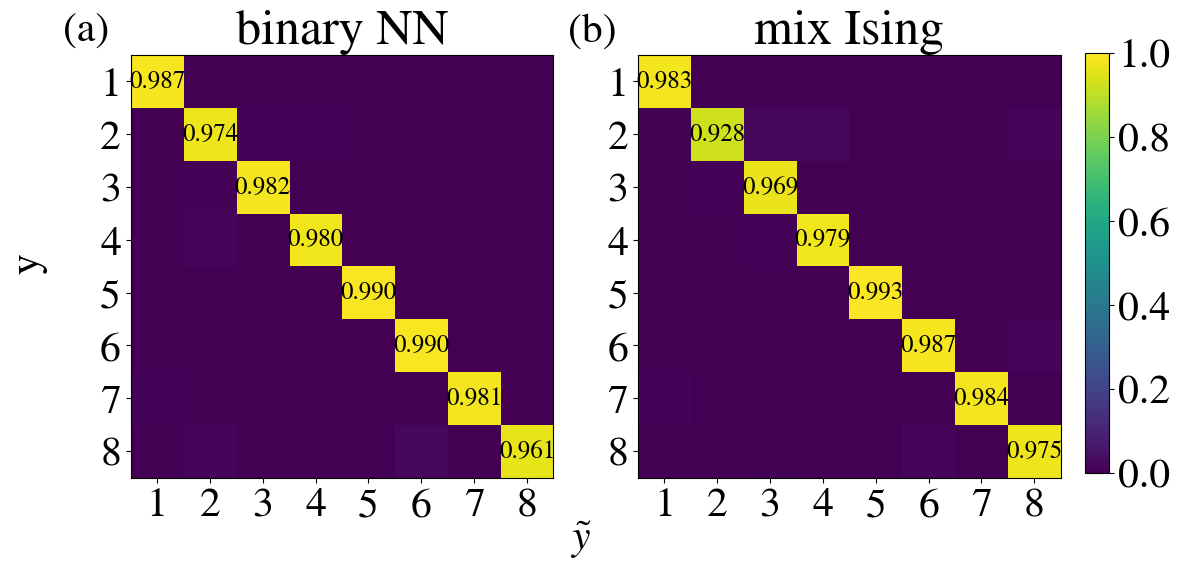

In [37]:
# Sample data for a 2x1 grid
labellist= np.array([ 1, 30, 31, 33, 9, 29 , 2, 28])
i=0
c_binNN = np.loadtxt(f'{folder}confusion_natNN_{d}.dat')
c_mixIinsg = np.loadtxt(f'{folder}confusion_mixising_{d}.dat')

#------------------------------------------------------------
fig, axs = plt.subplots(1,2, figsize=(12, 6))

# Plot data on each subplot
im1 = axs[0].imshow(c_binNN,vmin=0,vmax=1)
im2 = axs[1].imshow(c_mixIinsg,vmin=0,vmax=1)

i=0
axs[0].set_title('binary NN')
axs[1].set_title('mix Ising')



# List of data arrays and corresponding axes
data_list = [c_binNN, c_mixIinsg]
axs_list = [axs[0], axs[1]]

# Annotate diagonal elements
for data, ax in zip(data_list, axs_list):
    numrows, numcols = data.shape
    for i in range(min(numrows, numcols)):
        ax.text(i, i, f'{data[i, i]:.3f}', ha='center', va='center', color='black', fontsize=18)
        ax.set_xticks(range(len(labellist)), range(1,(len(labellist)+1)))
        ax.set_yticks(range(len(labellist)), range(1,(len(labellist)+1)))
    
        
# Create an axis on the right side for the colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

# Create a single colorbar
cbar = fig.colorbar(im1, cax=cbar_ax)

fig.text(0.5, 0.04, r'$\tilde{y}$', ha='center', va='center')
fig.text(0.04, 0.5, 'y', ha='center', va='center', rotation='vertical')

# plt.show()

# Add labels a, b, c, d, e
labels2 = ['(a)','(b)']
for labell, ax in zip(labels2, axs_list):
    ax.text(-0.05, 1.1, labell, transform=ax.transAxes, 
             va='top', ha='right')

plt.savefig(f'{folder_saved}NN_vs_mixIsing.pdf')

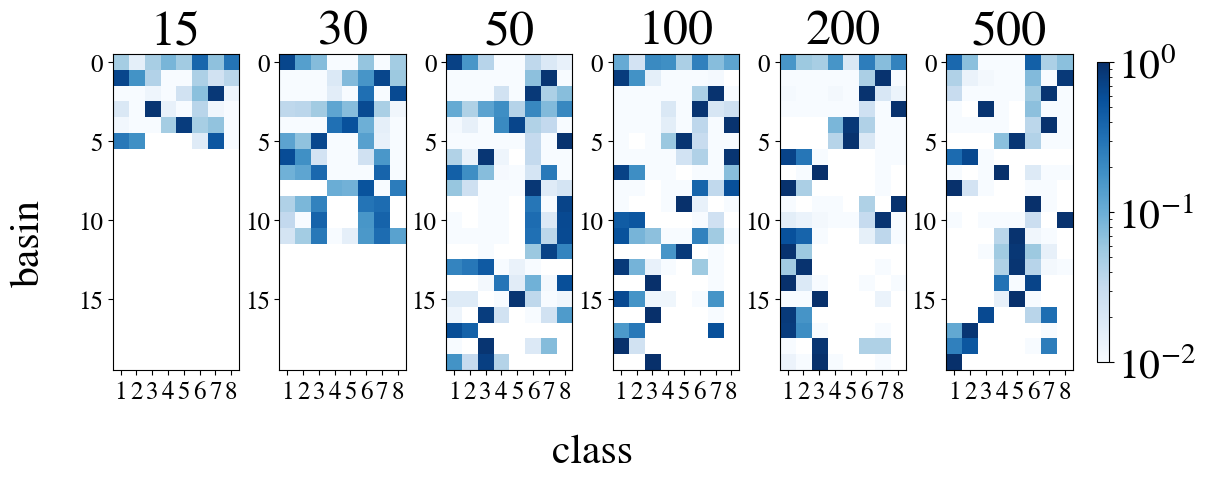

In [38]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 30})


ds = [15,30,50,100,200,500]
label='all'
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.colors as mcolors
from matplotlib.ticker import FormatStrFormatter
# Sample data for a 1x6 grid
i=0
data1 = np.loadtxt(f'{folder_bin}prob_table_{ds[i]}_{label}.dat')[:20]; i+=1
data2 = np.loadtxt(f'{folder_bin}prob_table_{ds[i]}_{label}.dat')[:20]; i+=1
data3 = np.loadtxt(f'{folder_bin}prob_table_{ds[i]}_{label}.dat')[:20]; i+=1
data4 = np.loadtxt(f'{folder_bin}prob_table_{ds[i]}_{label}.dat')[:20]; i+=1
data5 = np.loadtxt(f'{folder_bin}prob_table_{ds[i]}_{label}.dat')[:20]; i+=1
data6 = np.loadtxt(f'{folder_bin}prob_table_{ds[i]}_{label}.dat')[:20]; i+=1

data1 = np.vstack((data1, np.zeros((20 -len(data1),8))))
data2 = np.vstack((data2, np.zeros((20 -len(data2),8))))
data3 = np.vstack((data3, np.zeros((20 -len(data3),8))))
data4 = np.vstack((data4, np.zeros((20 -len(data4),8))))
data5 = np.vstack((data5, np.zeros((20 -len(data5),8))))
data6 = np.vstack((data6, np.zeros((20 -len(data6),8))))



fig, axs = plt.subplots(1, 6, figsize=(12, 6))

# Plot data on each subplot
im1 = axs[0].imshow(data1,cmap='Blues', norm=mcolors.LogNorm(vmin=1e-2, vmax=1))
im2 = axs[1].imshow(data2,cmap='Blues', norm=mcolors.LogNorm(vmin=1e-2, vmax=1))
im3 = axs[2].imshow(data3,cmap='Blues', norm=mcolors.LogNorm(vmin=1e-2, vmax=1))
im4 = axs[3].imshow(data4,cmap='Blues', norm=mcolors.LogNorm(vmin=1e-2, vmax=1))
im5 = axs[4].imshow(data5,cmap='Blues', norm=mcolors.LogNorm(vmin=1e-2, vmax=1))
im6 = axs[5].imshow(data6,cmap='Blues', norm=mcolors.LogNorm(vmin=1e-2, vmax=1))

# Set titles for each subplot
i=0
axs[0].set_title(ds[i]);i+=1
axs[1].set_title(ds[i]);i+=1
axs[2].set_title(ds[i]);i+=1
axs[3].set_title(ds[i]);i+=1
axs[4].set_title(ds[i]);i+=1
axs[5].set_title(ds[i]);i+=1


for i in range(6):
    axs[i].tick_params(axis='both', which='major', labelsize=18)
    axs[i].tick_params(axis='both', which='minor', labelsize=18)
    axs[i].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    axs[i].set_xticks(np.arange(0,8), np.arange(1,9))

# List of data arrays and corresponding axes
data_list = [data1, data2, data3, data4, data5, data6]
axs_list = [axs[0], axs[1], axs[2], axs[3], axs[4], axs[5]]

# Create an axis on the right side for the colorbar
cbar_ax = fig.add_axes([0.92, 0.3, 0.01, 0.5])

# Create a single colorbar
cbar = fig.colorbar(im1, cax=cbar_ax)

fig.text(0.5, 0.15, 'class', ha='center', va='center')
fig.text(0.03, 0.5, 'basin', ha='center', va='center', rotation='vertical')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.32)
plt.savefig(f'{folder_saved}entropies_1ising.pdf', bbox_inches='tight')

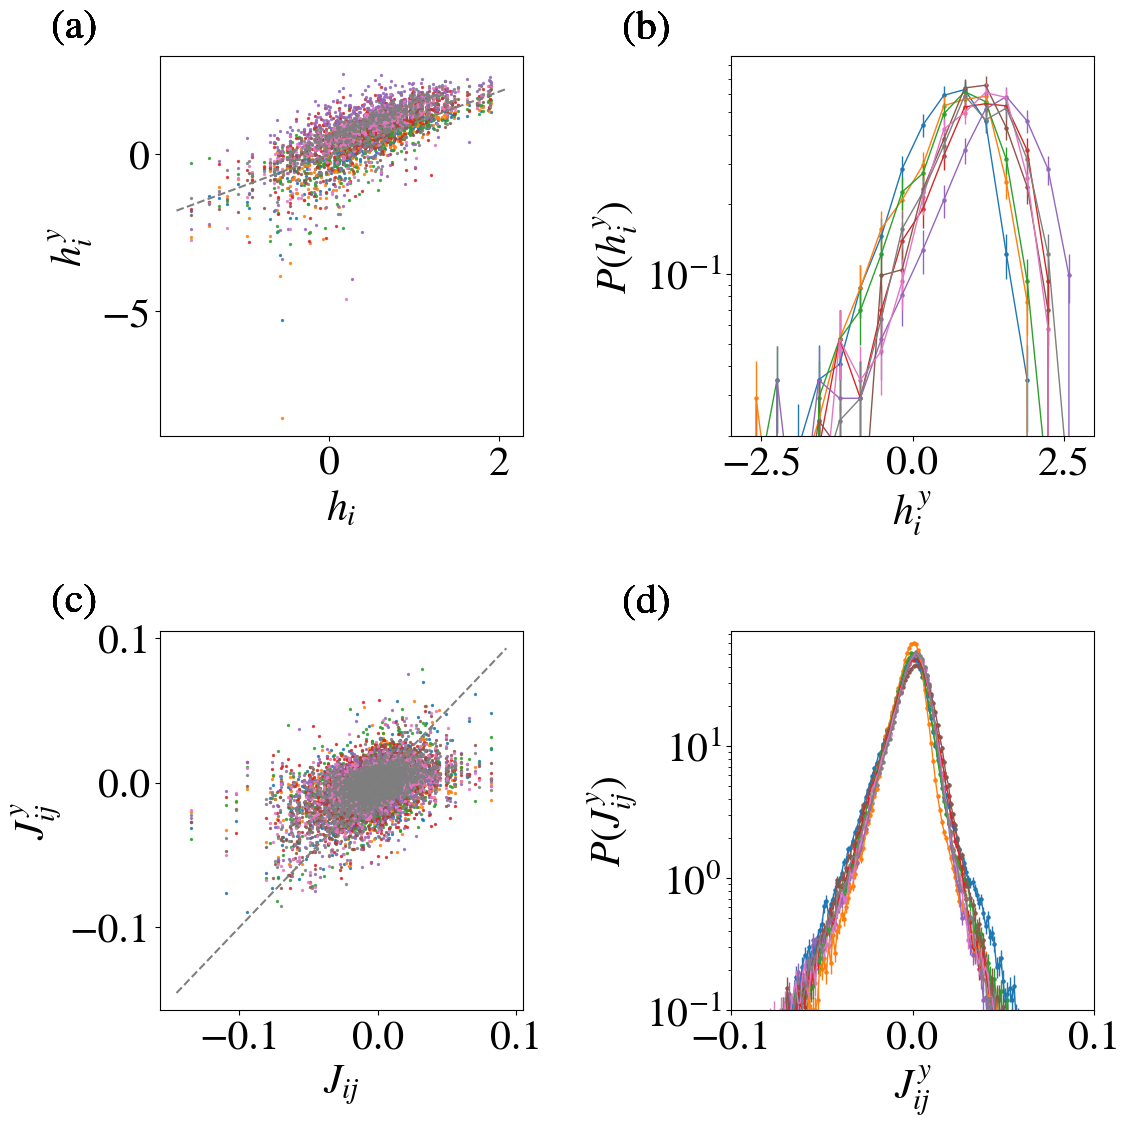

In [3]:
d=500
q_all = np.loadtxt(f'{folder_bin}q_{d}_all.dat')

lx = -0.3
ly = 1.05
plt.figure(figsize=(12,12))


q = np.loadtxt(f'{folder_bin}q_{d}_1.dat')
# bins_h = np.linspace(q[:d].min()/d,1.5*q[:d].max()/d,50)
bins_h = np.linspace(-5,5,30)

# bins_j = np.linspace(1.5*q[d:].min()/d,1.5*q[d:].max()/d,200)
bins_j = np.linspace(-0.3,0.3,500)



for label in [1,2,9,28,29,30,31,33]:
    q = np.loadtxt(f'{folder_bin}q_{d}_{label}.dat')
    h = q[:d]/d
    J = q[d:]/d
    
    # a ---------------------------------------
    plt.subplot(2,2,1)
    plt.scatter(q_all[:d]/d,q[:d]/d, s=2, alpha=0.8)
    plt.ylabel(r'$h_{i}^{y}$')
    plt.xlabel(r'$h_{i}$')
    plt.text(lx,ly,'(a)', transform=plt.gca().transAxes)
    
    # b ---------------------------------------
    plt.subplot(2,2,2)
    histo = np.histogram(h,bins=bins_h);
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    dx = histo[1][1]-histo[1][0]
    
    plt.scatter(histo[1][1:], histo[0]/histo[0].sum()/dx, color=color, s=5)
    plt.errorbar(histo[1][1:], histo[0]/histo[0].sum()/dx, np.sqrt(histo[0])/histo[0].sum()/dx, color=color, lw=1) 
    
#     plt.plot(histo[1][1:], histo[0])
    plt.yscale('log')
    plt.xlabel(r'$h_{i}^{y}$')
    plt.ylabel(r'$P(h_{i}^{y})$')
    plt.text(lx,ly,'(b)', transform=plt.gca().transAxes)
    
    plt.ylim(2e-2,)
    plt.xlim(-3,3)
    
    #  c ---------------------------------------
    
    plt.subplot(2,2,3)
#     histo = np.histogram(h,20, density=True);
#     plt.plot(histo[1][1:], histo[0])
    plt.scatter(q_all[d::50]/d,q[d::50]/d, s=2, alpha=0.8)
    plt.ylabel(r'$J_{ij}^{y}$')
    plt.xlabel(r'$J_{ij}$')
    plt.text(lx,ly,'(c)', transform=plt.gca().transAxes)
   

    # d ---------------------------------------
    plt.subplot(2,2,4)
    histo = np.histogram(J,bins=bins_j);
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    dx = histo[1][1]-histo[1][0]
    
    plt.scatter(histo[1][1:], histo[0]/ histo[0].sum()/dx, color=color, s=5)
    plt.errorbar(histo[1][1:], histo[0]/ histo[0].sum()/dx, np.sqrt(histo[0])/histo[0].sum()/dx,color=color, lw=1)
#     plt.plot(histo[1][1:], histo[0]/ histo[0].sum()/dx)
    
    plt.yscale('log')
    plt.xlabel(r'$J_{ij}^{y}$')
    plt.ylabel(r'$P(J_{ij}^{y})$')
    plt.text(lx,ly,'(d)', transform=plt.gca().transAxes)
    
    plt.ylim(1e-1,)
    plt.xlim(-1e-1,1e-1)
    

plt.subplot(2,2,1)
xmin,xmax = plt.gca().get_xlim()
xx=np.linspace(xmin,xmax,100)
plt.plot(xx,xx, color='grey', ls='--')

plt.subplot(2,2,3)
xmin,xmax = plt.gca().get_xlim()
xx=np.linspace(xmin,xmax,100)
plt.plot(xx,xx, color='grey', ls='--')

plt.tight_layout()

plt.savefig(f'{folder_saved}c.comparison_par_classes_{d}.pdf', bbox_inches='tight')

In [7]:
q1= np.loadtxt(f'{folder_bin}q_{d}_all.dat')
j1 = q1[d:]/d
h1 = q1[:d]/d


jall =[]
hall=[]
for label in [1,2,9,28,29,30,31,33]:
    q = np.loadtxt(f'{folder_bin}q_{d}_{label}.dat')
    h = q[:d]/d
    J = q[d:]/d
    
    jall.append(J)
    hall.append(h)
    
jall=np.array(jall)
hall=np.array(hall)

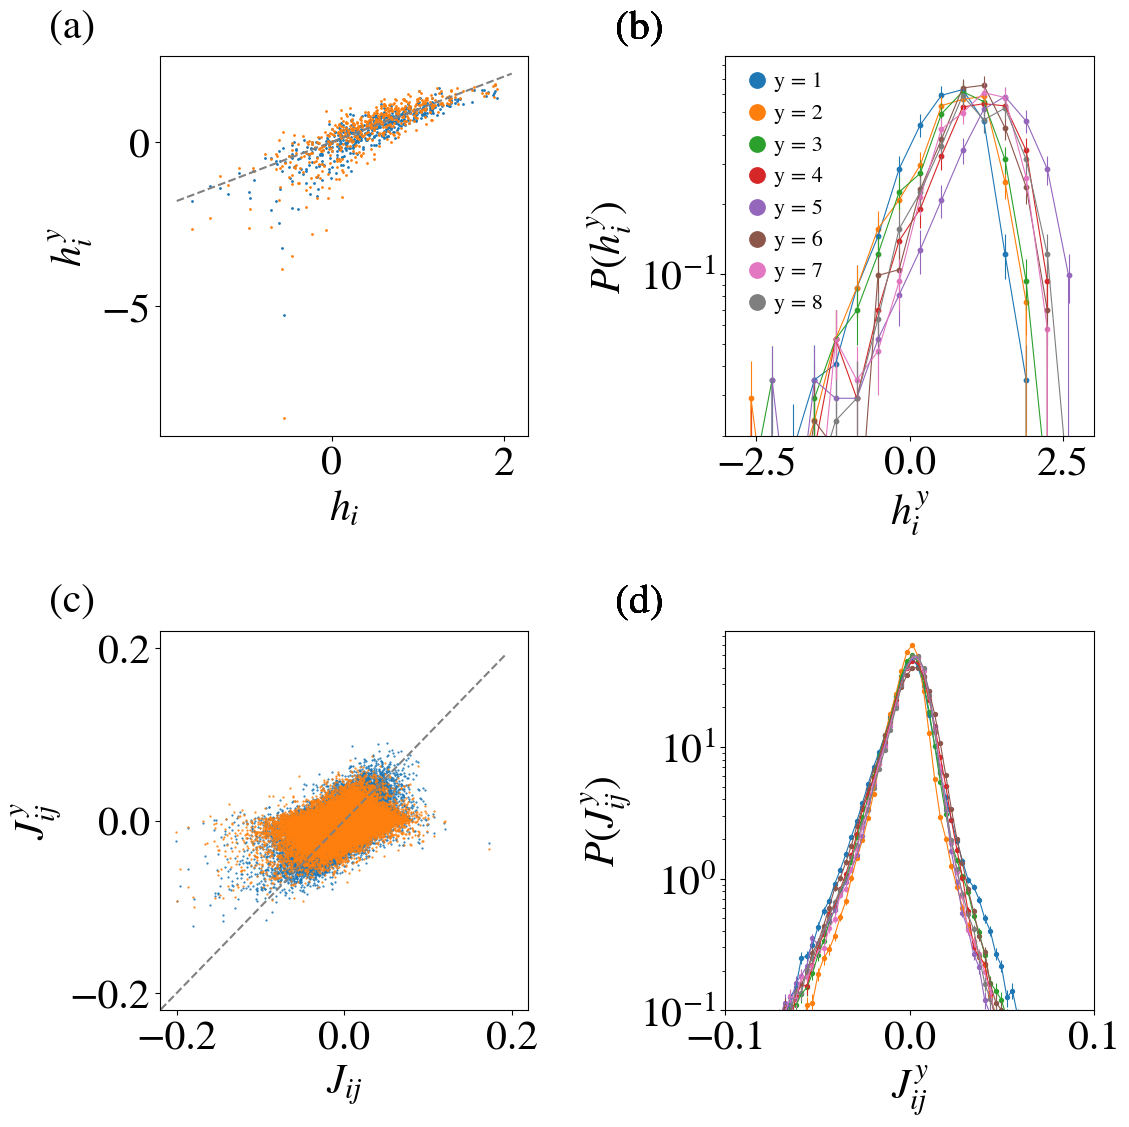

In [22]:
d=500
q_all = np.loadtxt(f'{folder_bin}q_{d}_all.dat')

lx = -0.3
ly = 1.05
plt.figure(figsize=(12,12))


q = np.loadtxt(f'{folder_bin}q_{d}_1.dat')
# bins_h = np.linspace(q[:d].min()/d,1.5*q[:d].max()/d,50)
bins_h = np.linspace(-5,5,30)

# bins_j = np.linspace(1.5*q[d:].min()/d,1.5*q[d:].max()/d,200)
bins_j = np.linspace(-0.3,0.3,200)


cl=0
for label in [1,2,9,28,29,30,31,33]:
    cl+=1
    q = np.loadtxt(f'{folder_bin}q_{d}_{label}.dat')
    h = q[:d]/d
    J = q[d:]/d
    
    # a ---------------------------------------
#     plt.subplot(2,2,1)
#     plt.scatter(q_all[:d]/d,q[:d]/d, s=2, alpha=0.8)
#     plt.ylabel(r'$h_{i}^{y}$')
#     plt.xlabel(r'$h_{i}$')
#     plt.text(lx,ly,'(a)', transform=plt.gca().transAxes)
    
    # b ---------------------------------------
    plt.subplot(2,2,2)
    histo = np.histogram(h,bins=bins_h);
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    dx = histo[1][1]-histo[1][0]
    
    plt.scatter(histo[1][1:], histo[0]/histo[0].sum()/dx, color=color, s=10, label = f'y = {cl}')
    plt.errorbar(histo[1][1:], histo[0]/histo[0].sum()/dx, np.sqrt(histo[0])/histo[0].sum()/dx, color=color, lw=0.8) 
    
#     plt.plot(histo[1][1:], histo[0])
    plt.yscale('log')
    plt.xlabel(r'$h_{i}^{y}$')
    plt.ylabel(r'$P(h_{i}^{y})$')
    plt.text(lx,ly,'(b)', transform=plt.gca().transAxes)
    plt.legend(fontsize=16,handletextpad=-0.2, loc=(0,0.3), frameon= False, markerscale=3.5)
    plt.ylim(2e-2,)
    plt.xlim(-3,3)
    
    #  c ---------------------------------------
    

   

    # d ---------------------------------------
    plt.subplot(2,2,4)
    histo = np.histogram(J,bins=bins_j);
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    dx = histo[1][1]-histo[1][0]
    
    plt.scatter(histo[1][1:], histo[0]/ histo[0].sum()/dx, color=color, s=8)
    plt.errorbar(histo[1][1:], histo[0]/ histo[0].sum()/dx, np.sqrt(histo[0])/histo[0].sum()/dx,color=color, lw=0.8)
#     plt.plot(histo[1][1:], histo[0]/ histo[0].sum()/dx)
    
    plt.yscale('log')
    plt.xlabel(r'$J_{ij}^{y}$')
    plt.ylabel(r'$P(J_{ij}^{y})$')
    plt.text(lx,ly,'(d)', transform=plt.gca().transAxes)
    
    plt.ylim(1e-1,)
    plt.xlim(-1e-1,1e-1)
    

plt.subplot(2,2,1)
xmin,xmax = plt.gca().get_xlim()
xx=np.linspace(xmin,xmax,100)
plt.plot(xx,xx, color='grey', ls='--')

# plt.subplot(2,2,3)
# xmin,xmax = plt.gca().get_xlim()
# xx=np.linspace(xmin,xmax,100)
# plt.plot(xx,xx, color='grey', ls='--')


ncl = 0

plt.gca().set_prop_cycle(None)
# color_cycle = ax._get_lines.prop_cycler
# colors = [next(color_cycle)['color'] for _ in range(10)]
# third_color = colors[ncl-1]

plt.subplot(2,2,3)
# plt.scatter(j1[::1000],jall[ncl,::1000], s=0.3, color='red')
plt.scatter(j1[::],jall[ncl,::], s=0.3)
plt.scatter(j1[::],jall[ncl+1,::], s=0.3)


xmin,xmax = plt.gca().get_xlim()
xx=np.linspace(xmin,xmax,100)
plt.plot(xx,xx, color='grey', ls='--')
plt.text(lx,ly,'(c)', transform=plt.gca().transAxes)
plt.ylabel(r'$J_{ij}^{y}$')
plt.xlabel(r'$J_{ij}$')
plt.xlim(-0.22,0.22)
plt.ylim(-0.22,0.22)



plt.subplot(2,2,1)
plt.scatter(h1,hall[ncl], s=1)
plt.scatter(h1,hall[ncl+1], s=1)

xmin,xmax = plt.gca().get_xlim()
xx=np.linspace(xmin,xmax,100)
plt.plot(xx,xx, color='grey', ls='--')
plt.ylabel(r'$h_{i}^{y}$')
plt.xlabel(r'$h_{i}$')
plt.text(lx,ly,'(a)', transform=plt.gca().transAxes)


plt.tight_layout()

plt.savefig(f'{folder_saved}c.comparison_par_classes_{d}_V2.png', bbox_inches='tight', dpi=300)

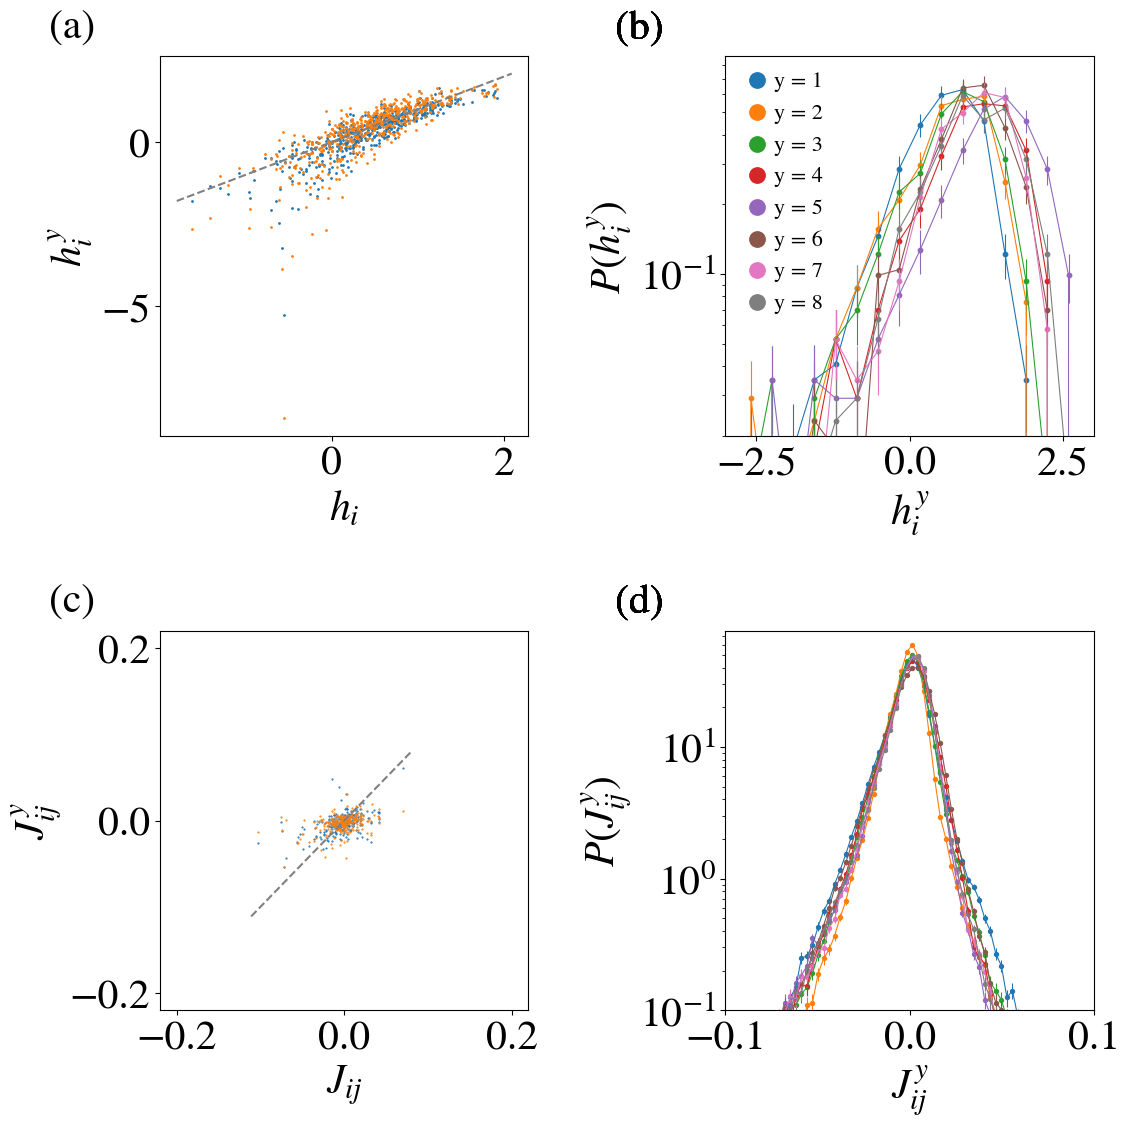

In [20]:
d=500
q_all = np.loadtxt(f'{folder_bin}q_{d}_all.dat')

lx = -0.3
ly = 1.05
plt.figure(figsize=(12,12))


q = np.loadtxt(f'{folder_bin}q_{d}_1.dat')
# bins_h = np.linspace(q[:d].min()/d,1.5*q[:d].max()/d,50)
bins_h = np.linspace(-5,5,30)

# bins_j = np.linspace(1.5*q[d:].min()/d,1.5*q[d:].max()/d,200)
bins_j = np.linspace(-0.3,0.3,200)


cl=0
for label in [1,2,9,28,29,30,31,33]:
    cl+=1
    q = np.loadtxt(f'{folder_bin}q_{d}_{label}.dat')
    h = q[:d]/d
    J = q[d:]/d
    
    # a ---------------------------------------
#     plt.subplot(2,2,1)
#     plt.scatter(q_all[:d]/d,q[:d]/d, s=2, alpha=0.8)
#     plt.ylabel(r'$h_{i}^{y}$')
#     plt.xlabel(r'$h_{i}$')
#     plt.text(lx,ly,'(a)', transform=plt.gca().transAxes)
    
    # b ---------------------------------------
    plt.subplot(2,2,2)
    histo = np.histogram(h,bins=bins_h);
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    dx = histo[1][1]-histo[1][0]
    
    plt.scatter(histo[1][1:], histo[0]/histo[0].sum()/dx, color=color, s=10, label = f'y = {cl}')
    plt.errorbar(histo[1][1:], histo[0]/histo[0].sum()/dx, np.sqrt(histo[0])/histo[0].sum()/dx, color=color, lw=0.8) 
    
#     plt.plot(histo[1][1:], histo[0])
    plt.yscale('log')
    plt.xlabel(r'$h_{i}^{y}$')
    plt.ylabel(r'$P(h_{i}^{y})$')
    plt.text(lx,ly,'(b)', transform=plt.gca().transAxes)
    plt.legend(fontsize=16,handletextpad=-0.2, loc=(0,0.3), frameon= False, markerscale=3.5)
    plt.ylim(2e-2,)
    plt.xlim(-3,3)
    
    #  c ---------------------------------------
    

   

    # d ---------------------------------------
    plt.subplot(2,2,4)
    histo = np.histogram(J,bins=bins_j);
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    dx = histo[1][1]-histo[1][0]
    
    plt.scatter(histo[1][1:], histo[0]/ histo[0].sum()/dx, color=color, s=8)
    plt.errorbar(histo[1][1:], histo[0]/ histo[0].sum()/dx, np.sqrt(histo[0])/histo[0].sum()/dx,color=color, lw=0.8)
#     plt.plot(histo[1][1:], histo[0]/ histo[0].sum()/dx)
    
    plt.yscale('log')
    plt.xlabel(r'$J_{ij}^{y}$')
    plt.ylabel(r'$P(J_{ij}^{y})$')
    plt.text(lx,ly,'(d)', transform=plt.gca().transAxes)
    
    plt.ylim(1e-1,)
    plt.xlim(-1e-1,1e-1)
    

plt.subplot(2,2,1)
xmin,xmax = plt.gca().get_xlim()
xx=np.linspace(xmin,xmax,100)
plt.plot(xx,xx, color='grey', ls='--')

# plt.subplot(2,2,3)
# xmin,xmax = plt.gca().get_xlim()
# xx=np.linspace(xmin,xmax,100)
# plt.plot(xx,xx, color='grey', ls='--')


ncl = 7

plt.gca().set_prop_cycle(None)
# color_cycle = ax._get_lines.prop_cycler
# colors = [next(color_cycle)['color'] for _ in range(10)]
# third_color = colors[ncl-1]

plt.subplot(2,2,3)
# plt.scatter(j1[::1000],jall[ncl,::1000], s=0.3, color='red')
plt.scatter(j1[::500],jall[ncl,::500], s=0.3)
plt.scatter(j1[::500],jall[ncl+1,::500], s=0.3)


xmin,xmax = plt.gca().get_xlim()
xx=np.linspace(xmin,xmax,100)
plt.plot(xx,xx, color='grey', ls='--')
plt.text(lx,ly,'(c)', transform=plt.gca().transAxes)
plt.ylabel(r'$J_{ij}^{y}$')
plt.xlabel(r'$J_{ij}$')
plt.xlim(-0.22,0.22)
plt.ylim(-0.22,0.22)



plt.subplot(2,2,1)
plt.scatter(h1,hall[ncl], s=1)
plt.scatter(h1,hall[ncl+1], s=1)

xmin,xmax = plt.gca().get_xlim()
xx=np.linspace(xmin,xmax,100)
plt.plot(xx,xx, color='grey', ls='--')
plt.ylabel(r'$h_{i}^{y}$')
plt.xlabel(r'$h_{i}$')
plt.text(lx,ly,'(a)', transform=plt.gca().transAxes)


plt.tight_layout()

plt.savefig(f'{folder_saved}c.comparison_par_classes_{d}_V2.pdf', bbox_inches='tight')